# Import Libraries and Load Dataframe

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as sm
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as sms
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import TimeSeriesSplit

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

%matplotlib inline

In [105]:
df = pd.read_csv('ethylene_methane.txt', delim_whitespace=True, skiprows=1, header=None, names=['Time','Methane','Ethylene','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16'])

In [5]:
df.head()

Time  Methane  Ethylene      1        2      3      4      5      6     7  \
0  0.00      0.0       0.0 -41.98  2067.64 -37.13   2.28   8.63 -26.62 -8.46   
1  0.01      0.0       0.0 -46.50  2067.88 -28.56  13.69 -12.35 -25.81 -5.04   
2  0.02      0.0       0.0 -36.16  2055.81 -10.89   8.63  -2.93 -30.34 -9.27   
3  0.03      0.0       0.0 -50.36  2053.68 -31.96  -0.65  -8.29 -21.60  7.98   
4  0.04      0.0       0.0 -37.30  2081.17 -36.16   3.26   5.05 -26.14 -7.48   

      8        9       10       11       12       13       14       15  \
0 -0.33  3437.73  2728.14  4054.03  4007.89  4478.27  5056.98  3639.09   
1 -5.04  3432.44  2734.47  4038.62  4019.40  4496.72  5051.81  3636.97   
2 -2.12  3438.61  2719.97  4030.92  4025.48  4489.54  5057.35  3641.81   
3  2.28  3429.51  2720.50  4040.22  4000.87  4485.44  5049.60  3642.72   
4 -0.65  3436.85  2719.71  4029.64  4007.25  4499.12  5057.35  3674.30   

        16  
0  3128.49  
1  3115.03  
2  3105.24  
3  3124.84  
4  3147.59

In [6]:
df.describe()

Time       Methane      Ethylene             1             2  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.089566e+04  5.808503e+01  4.369478e+00  2.520157e+03  1.711449e+03   
std    1.206404e+04  7.663941e+01  5.521296e+00  2.532045e+02  1.184762e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00 -5.648000e+01  1.568880e+03   
25%    1.044672e+04  0.000000e+00  0.000000e+00  2.335120e+03  1.639010e+03   
50%    2.089672e+04  0.000000e+00  0.000000e+00  2.463490e+03  1.701300e+03   
75%    3.134324e+04  1.000000e+02  8.330000e+00  2.676930e+03  1.754580e+03   
max    4.179019e+04  2.966700e+02  2.000000e+01  3.402560e+03  9.825750e+03   

                  3             4             5             6             7  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.756596e+03  3.035848e+03  1.863258e+03  2.386329e+03  2.689914e+03   
std    1.150495e+03  1.252085e+03  1.104965e+03  1.425092e+03  1.102780e+03   
min   -4.778000e+01 -6.830000e+00 -1.268000e+01 -4.198000e+01 -1.528000e+01   
25%    1.581310e+03  1.750760e+03  8.197600e+02  1.061500e+03  1.533260e+03   
50%    2.885640e+03  3.199850e+03  1.393180e+03  1.688830e+03  2.785620e+03   
75%    3.798990e+03  4.172030e+03  2.813350e+03  3.605260e+03  3.610690e+03   
max    5.567440e+03  6.127680e+03  4.420840e+03  5.707530e+03  5.304140e+03   

                  8             9            10            11            12  \
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06   
mean   2.978962e+03  3.541804e+03  2.823842e+03  2.301598e+03  2.024606e+03   
std    1.229724e+03  2.607058e+02  2.002925e+02  9.875315e+02  8.246309e+02   
min   -1.187000e+01  2.976530e+03  2.367650e+03  6.898700e+02  5.817900e+02   
25%    1.660440e+03  3.344630e+03  2.672740e+03  1.409680e+03  1.201660e+03   
50%    3.136350e+03  3.481370e+03  2.782960e+03  2.174530e+03  2.072150e+03   
75%    4.083020e+03  3.708470e+03  2.943730e+03  3.140840e+03  2.701560e+03   
max    5.820370e+03  4.436430e+03  3.519340e+03  4.849910e+03  4.062070e+03   

                 13            14            15            16  
count  4.178504e+06  4.178504e+06  4.178504e+06  4.178504e+06  
mean   1.687490e+03  1.806279e+03  2.309401e+03  1.862996e+03  
std    9.865598e+02  1.102382e+03  9.652522e+02  7.658043e+02  
min    4.433000e+02  4.239800e+02  7.713900e+02  5.890900e+02  
25%    7.593200e+02  7.685600e+02  1.424110e+03  1.113520e+03  
50%    1.266570e+03  1.332660e+03  2.165370e+03  1.839750e+03  
75%    2.543380e+03  2.746090e+03  3.123440e+03  2.506360e+03  
max    4.540980e+03  5.108820e+03  4.699970e+03  3.764370e+03

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 19 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Time      float64
 1   Methane   float64
 2   Ethylene  float64
 3   1         float64
 4   2         float64
 5   3         float64
 6   4         float64
 7   5         float64
 8   6         float64
 9   7         float64
 10  8         float64
 11  9         float64
 12  10        float64
 13  11        float64
 14  12        float64
 15  13        float64
 16  14        float64
 17  15        float64
 18  16        float64
dtypes: float64(19)
memory usage: 605.7 MB


# Running F-tests and features selection
- F_test: calculate the dependency of y against individual features in X. F_test can only captures linear dependency. 
- Mutual information also calculates the dependency of y against any features of X. However, it can capture any kind of dependency.

In [218]:
X = df[['Time','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
y_meth = df[['Methane']]
y_eth = df[['Ethylene']]

In [220]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(0)

f_test, _ = f_regression(X, y_meth)
f_test /= np.max(f_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [221]:
f_test

array([0.01074963, 0.01571542, 0.0034408 , 0.13664874, 0.15750353,
       0.88465206, 1.        , 0.09732251, 0.14837062, 0.00880546,
       0.0141088 , 0.01118355, 0.06988268, 0.92838394, 0.90432949,
       0.01118692, 0.03429164])

In [222]:
mi = mutual_info_regression(X, y_meth)
mi /= np.max(mi)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [223]:
mi

array([1.        , 0.24370959, 0.30992318, 0.31027958, 0.31490059,
       0.49436348, 0.54517293, 0.35470278, 0.34484513, 0.20983418,
       0.20917463, 0.31138069, 0.31277276, 0.48901168, 0.4878391 ,
       0.34548244, 0.34558496])

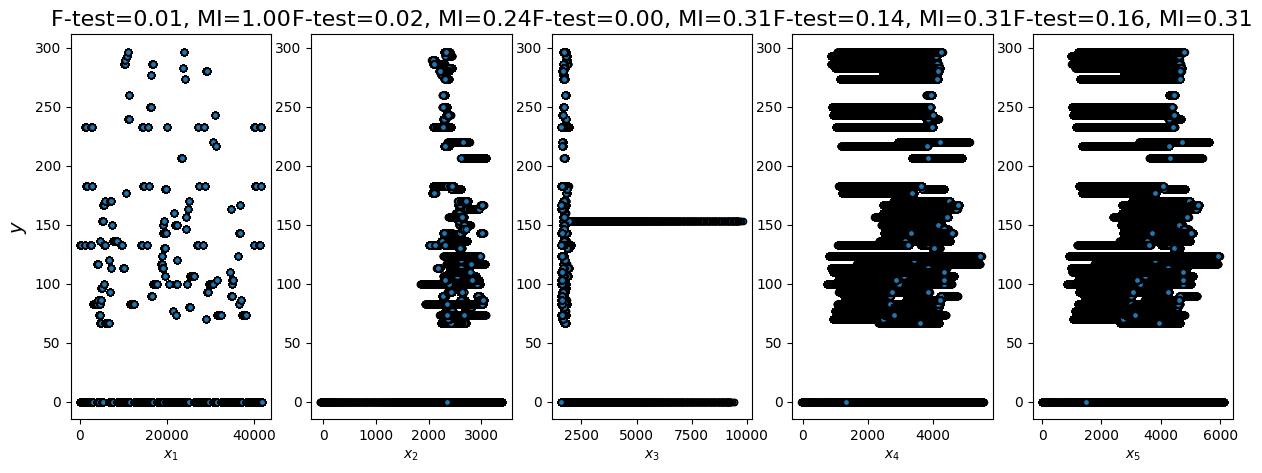

In [241]:

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.scatter(X.iloc[:, i], y_meth, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=10)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()

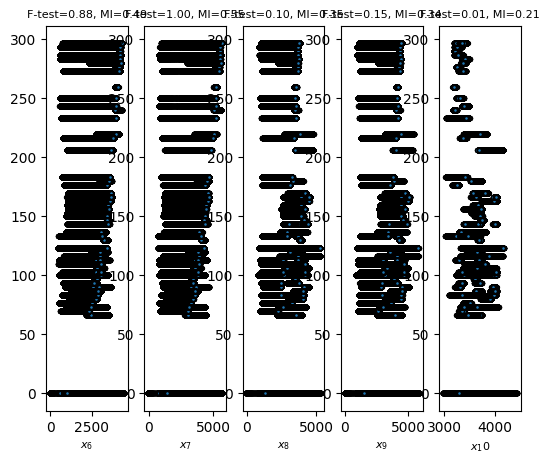

In [254]:

plt.figure(figsize=(15, 5))
for i in range(5,10):
    plt.subplot(1, 12, i + 1)
    plt.scatter(X.iloc[:, i], y_meth, edgecolor="black", s=8)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=8)
    if i == 0:
        plt.ylabel("$y$", fontsize=8)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=8)
plt.show()

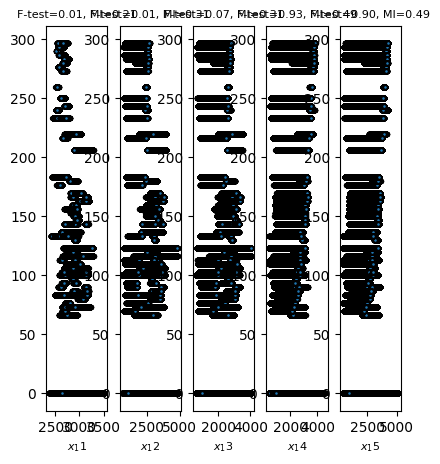

In [256]:

plt.figure(figsize=(15, 5))
for i in range(10,15):
    plt.subplot(1, 16, i + 1)
    plt.scatter(X.iloc[:, i], y_meth, edgecolor="black", s=8)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=8)
    if i == 0:
        plt.ylabel("$y$", fontsize=8)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=8)
plt.show()

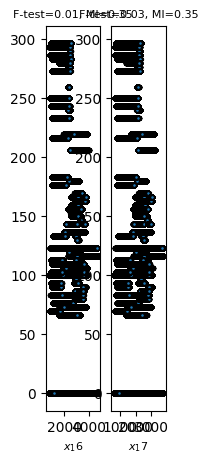

In [257]:

plt.figure(figsize=(15, 5))
for i in range(15,len(mi)):
    plt.subplot(1, 18, i + 1)
    plt.scatter(X.iloc[:, i], y_meth, edgecolor="black", s=8)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=8)
    if i == 0:
        plt.ylabel("$y$", fontsize=8)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=8)
plt.show()

In [262]:
# Get the statistics of each column in X (round to integers)
X.describe().astype(int)

Time        1        2        3        4        5        6        7  \
count  4178504  4178504  4178504  4178504  4178504  4178504  4178504  4178504   
mean     20895     2520     1711     2756     3035     1863     2386     2689   
std      12064      253      118     1150     1252     1104     1425     1102   
min          0      -56     1568      -47       -6      -12      -41      -15   
25%      10446     2335     1639     1581     1750      819     1061     1533   
50%      20896     2463     1701     2885     3199     1393     1688     2785   
75%      31343     2676     1754     3798     4172     2813     3605     3610   
max      41790     3402     9825     5567     6127     4420     5707     5304   

             8        9       10       11       12       13       14       15  \
count  4178504  4178504  4178504  4178504  4178504  4178504  4178504  4178504   
mean      2978     3541     2823     2301     2024     1687     1806     2309   
std       1229      260      200      987      824      986     1102      965   
min        -11     2976     2367      689      581      443      423      771   
25%       1660     3344     2672     1409     1201      759      768     1424   
50%       3136     3481     2782     2174     2072     1266     1332     2165   
75%       4083     3708     2943     3140     2701     2543     2746     3123   
max       5820     4436     3519     4849     4062     4540     5108     4699   

            16  
count  4178504  
mean      1862  
std        765  
min        589  
25%       1113  
50%       1839  
75%       2506  
max       3764

In [265]:
#Get the kurtosis (skewness level & distribution test)
'''
Kurtosis value can reach from 1 to + infinity. 
But generally, a kurtosis value = 3 (Mesokurtic) indicates a normal distribution. 
Kurtosis value > 3 indicates positive kurtosis (Laptokurtic) with low SD
    - This distribution appears as a curve one with long tails (outliers.) 
    - The "skinniness" of a leptokurtic distribution is a consequence of the outliers, which stretch the horizontal axis of the histogram graph,
    - making the bulk of the data appear in a narrow ("skinny") vertical range.
Kurtosis value <3 indicates negative kurtosis (Platicurtic).
    - These types of distributions have short tails (fewer outliers.).
    - Platykurtic distributions have demonstrated more stability than other curves
'''
df.kurt()

Time          -1.200053
Methane        0.673621
Ethylene      -0.350743
1              0.913863
2           1122.432110
3             -1.230317
4             -1.237538
5             -1.329400
6             -1.239166
7             -1.218981
8             -1.261212
9             -0.063356
10             0.022754
11            -0.927375
12            -1.143991
13            -1.334072
14            -1.279842
15            -0.954021
16            -1.049851
dtype: float64

In [266]:
'''
If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
'''
df.skew()

Time        -0.000112
Methane      1.196134
Ethylene     0.884035
1            0.603177
2           22.547805
3           -0.158033
4           -0.178284
5            0.330368
6            0.416184
7           -0.098752
8           -0.176320
9            0.647715
10           0.656399
11           0.298427
12          -0.052763
13           0.329236
14           0.357366
15           0.324487
16           0.145861
dtype: float64

# Split Data into Train, Test, and Deployment Sets

In [144]:
x1 = df[['Time','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
y = df[['Methane', 'Ethylene']]


# Split data sets evenly into training, test, and deployment (40%, 30%, 30%)
x1_train, x1_deployment_test, y_train, y_deployment_test = train_test_split(x1, y, test_size=0.6, random_state=42, shuffle = False)
x1_test, x1_deployment, y_test, y_deployment = train_test_split(x1_deployment_test, y_deployment_test, test_size = 0.5, shuffle =  False)

In [9]:
x1_deployment.info(), x1_train.info(), x1_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253552 entries, 2924952 to 4178503
Data columns (total 17 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Time    1253552 non-null  float64
 1   1       1253552 non-null  float64
 2   2       1253552 non-null  float64
 3   3       1253552 non-null  float64
 4   4       1253552 non-null  float64
 5   5       1253552 non-null  float64
 6   6       1253552 non-null  float64
 7   7       1253552 non-null  float64
 8   8       1253552 non-null  float64
 9   9       1253552 non-null  float64
 10  10      1253552 non-null  float64
 11  11      1253552 non-null  float64
 12  12      1253552 non-null  float64
 13  13      1253552 non-null  float64
 14  14      1253552 non-null  float64
 15  15      1253552 non-null  float64
 16  16      1253552 non-null  float64
dtypes: float64(17)
memory usage: 172.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671401 entries, 0 to 1671400
Data columns (tot

(None, None, None)

In [10]:
x1_deployment

Time        1        2        3        4        5        6  \
2924952  29253.99  2402.60  1667.96  2169.71  2474.11  2469.30  3247.09   
2924953  29254.00  2424.42  1655.57  2166.34  2472.34  2472.34  3256.24   
2924954  29254.01  2422.91  1663.09  2174.29  2459.95  2462.22  3280.02   
2924955  29254.02  2417.14  1658.22  2167.06  2466.52  2481.46  3245.66   
2924956  29254.03  2416.89  1659.77  2155.26  2468.80  2470.32  3254.81   
...           ...      ...      ...      ...      ...      ...      ...   
4178499  41790.15  2348.01  1599.24  1329.94  1488.62  1031.11  1431.76   
4178500  41790.16  2341.81  1605.37  1333.28  1479.61  1022.80  1421.56   
4178501  41790.17  2345.78  1604.06  1337.47  1475.10  1022.61  1423.68   
4178502  41790.18  2350.25  1594.86  1323.68  1492.49  1041.03  1434.53   
4178503  41790.19  2348.01  1598.80  1338.93  1490.34  1033.49  1405.23   

               7        8        9       10       11       12       13  \
2924952  2283.58  2698.94  3350.14  2687.14  1358.22  1544.97  2275.48   
2924953  2291.69  2707.87  3349.27  2685.57  1346.47  1539.33  2276.71   
2924954  2291.20  2708.92  3351.30  2681.64  1341.65  1537.38  2276.71   
2924955  2280.14  2704.71  3358.55  2688.97  1345.00  1535.86  2249.05   
2924956  2282.10  2704.45  3359.72  2698.68  1360.95  1529.15  2242.21   
...          ...      ...      ...      ...      ...      ...      ...   
4178499  1335.58  1506.05  3300.43  2634.70  1156.91   975.15   972.41   
4178500  1336.00  1500.45  3277.72  2640.67  1155.49   975.15   963.60   
4178501  1345.63  1504.76  3299.56  2622.24  1153.47   964.18   978.68   
4178502  1338.72  1508.85  3296.69  2640.15  1150.03   971.04   976.92   
4178503  1337.68  1518.34  3292.95  2633.40  1152.05   977.51   984.96   

              14       15       16  
2924952  2389.34  1577.16  1397.20  
2924953  2410.37  1562.35  1409.05  
2924954  2394.84  1557.78  1404.60  
2924955  2412.12  1584.80  1420.92  
2924956  2411.62  1568.66  1424.11  
...          ...      ...      ...  
4178499   929.27  1211.47   948.94  
4178500   938.42  1222.74   937.25  
4178501   949.92  1204.32   921.50  
4178502   940.76  1212.09   946.99  
4178503   934.14  1201.46   932.38  

[1253552 rows x 17 columns]

In [145]:
# Combine the dataframes
train_df = pd.concat([x1_train, y_train], axis = 1)
test_df = pd.concat([x1_test, y_test], axis = 1)

# Perform Initial Round of EDA 
(Need to verify each sensor is working)

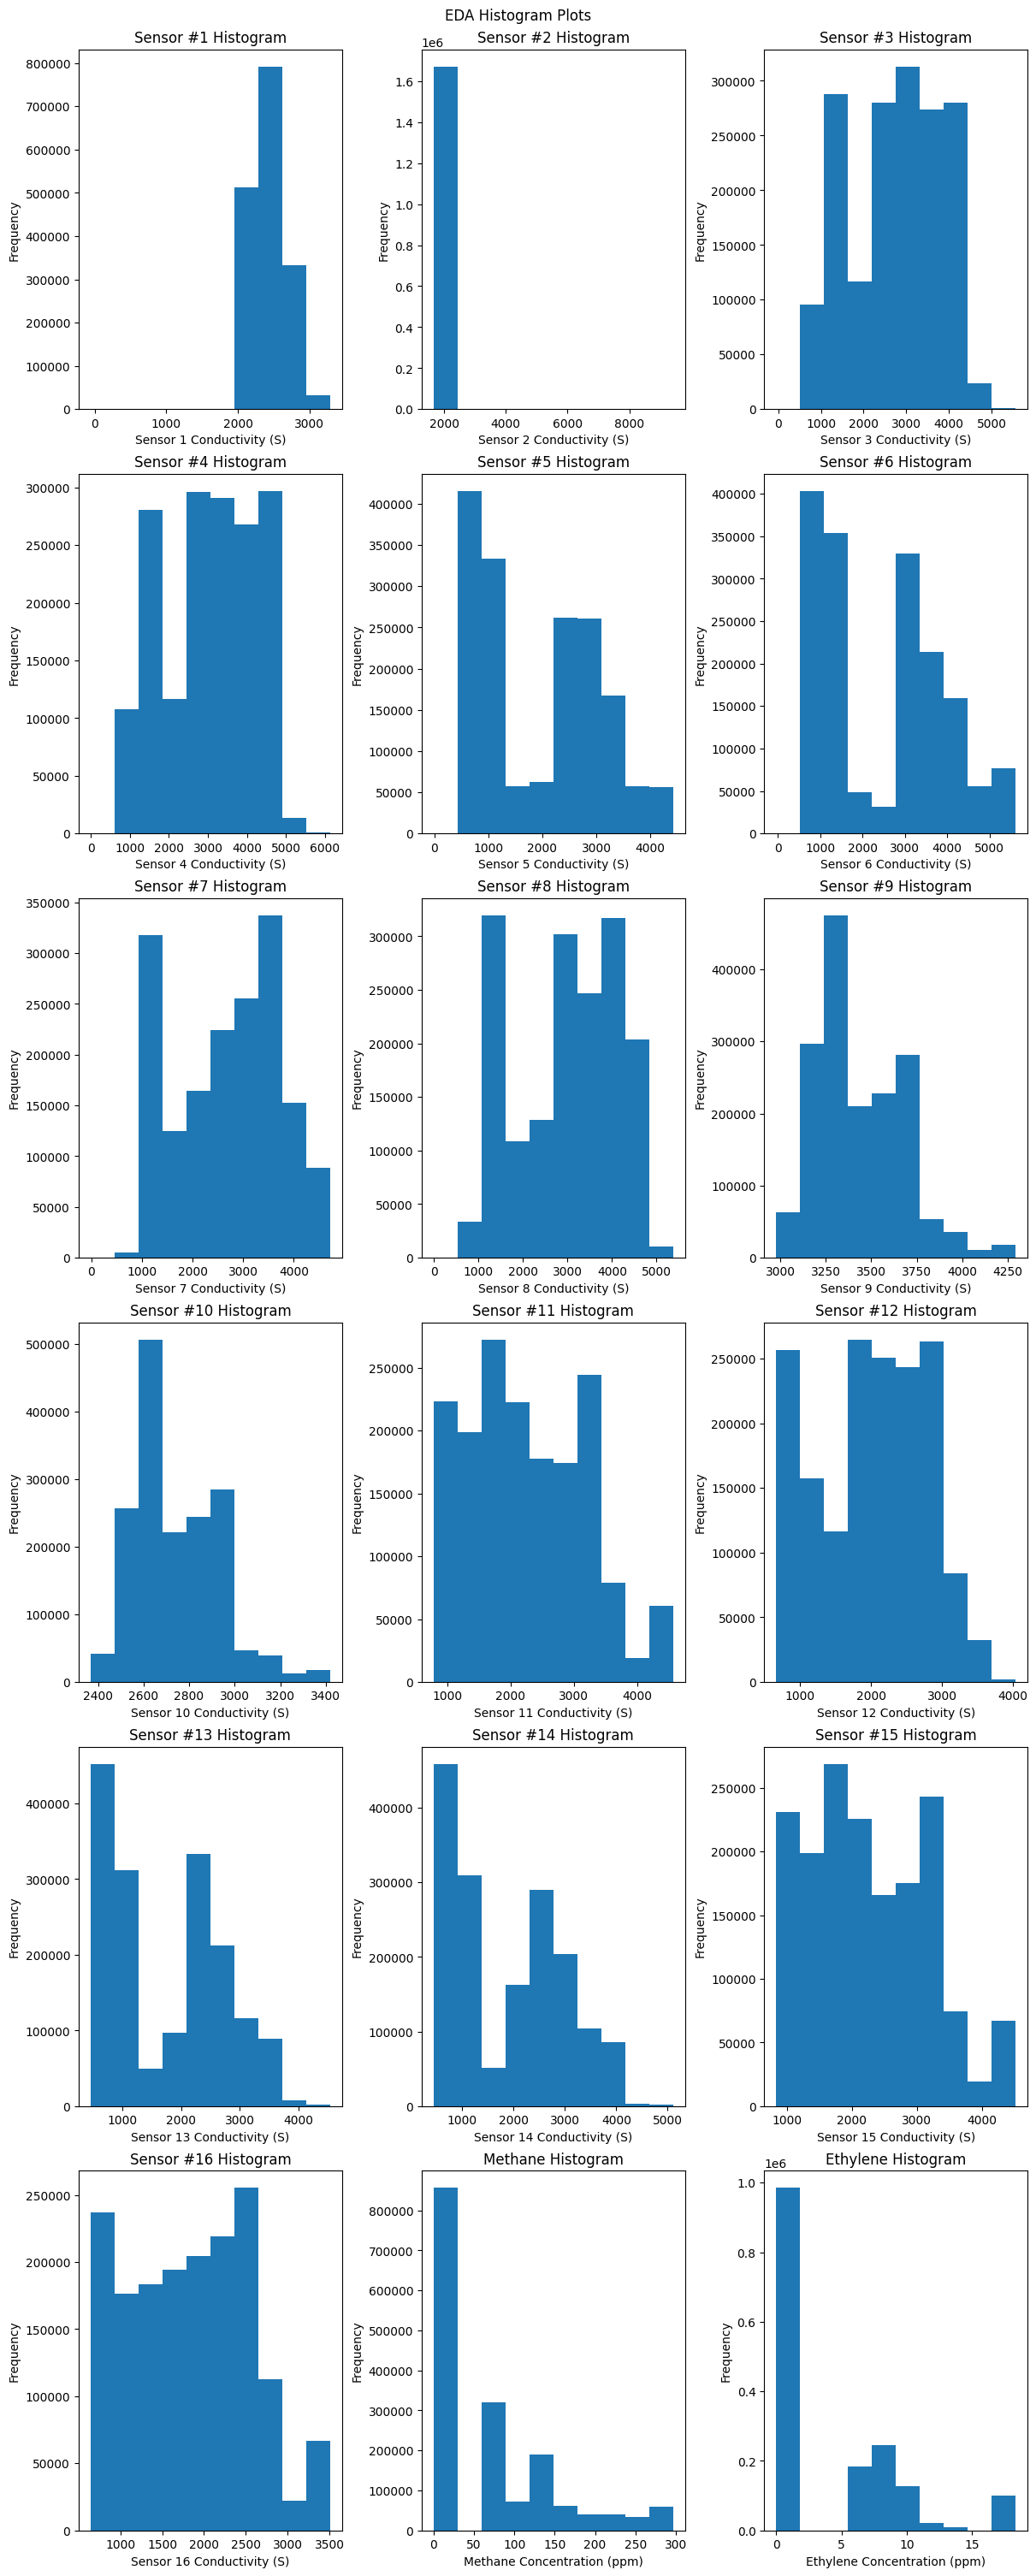

In [108]:
# Plot standard plots (all histograms + a time scatter plot)
fig = plt.figure(figsize = (12, 30), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
for i in range(1, 19):
    ax1 = fig.add_subplot(18//3, 3, i)
    ax1.hist(train_df.iloc[:,i])
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        x_label_string = "Sensor " + x_label_string + " Conductivity (S)"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < 17:
        ax1.title.set_text("Sensor #" + train_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_df.iloc[:,i].name + " Histogram") 
plt.show()

In [13]:
import matplotlib
color_list = ["pink", "red", "maroon", "salmon", "orange", "yellow", "yellowgreen", "green", "cyan", "blue", "indigo", "violet", "gray", "black", "brown", "chocolate"]
colors = [matplotlib.colors.cnames[color] for color in color_list]

In [14]:
# Plot standard plots (all histograms + a time scatter plot) over all datapoints
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = df.iloc[:,i].name
    if i > 2:
        ax_scatter_conduct.plot(df.iloc[:,0], df.iloc[:,i], label = x_label_string, color = colors[i - 3])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors Of All Datapoints") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(df.iloc[:,0], df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations Of All Datapoints")
        ax_scatter_concentration.legend()   
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

C:\Users\jacob\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


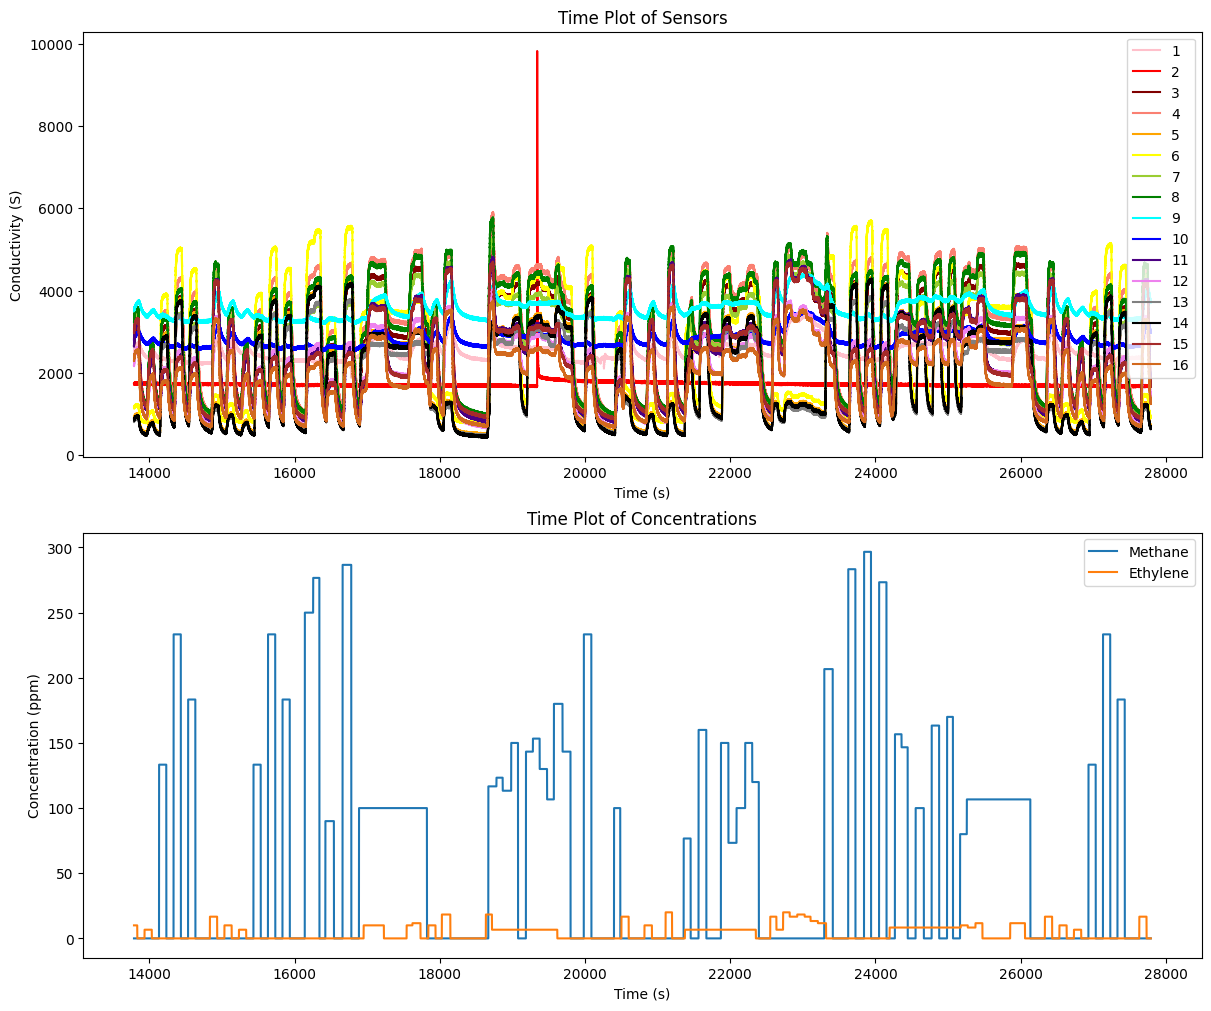

In [ ]:
# Plot standard plots (all histograms + a time scatter plot)
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, 19):
    x_label_string = train_df.iloc[:,i].name
    if i < 17:
        ax_scatter_conduct.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string, color = colors[i - 1])
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(train_df.iloc[:,0], train_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

Let's check each sensor of each type

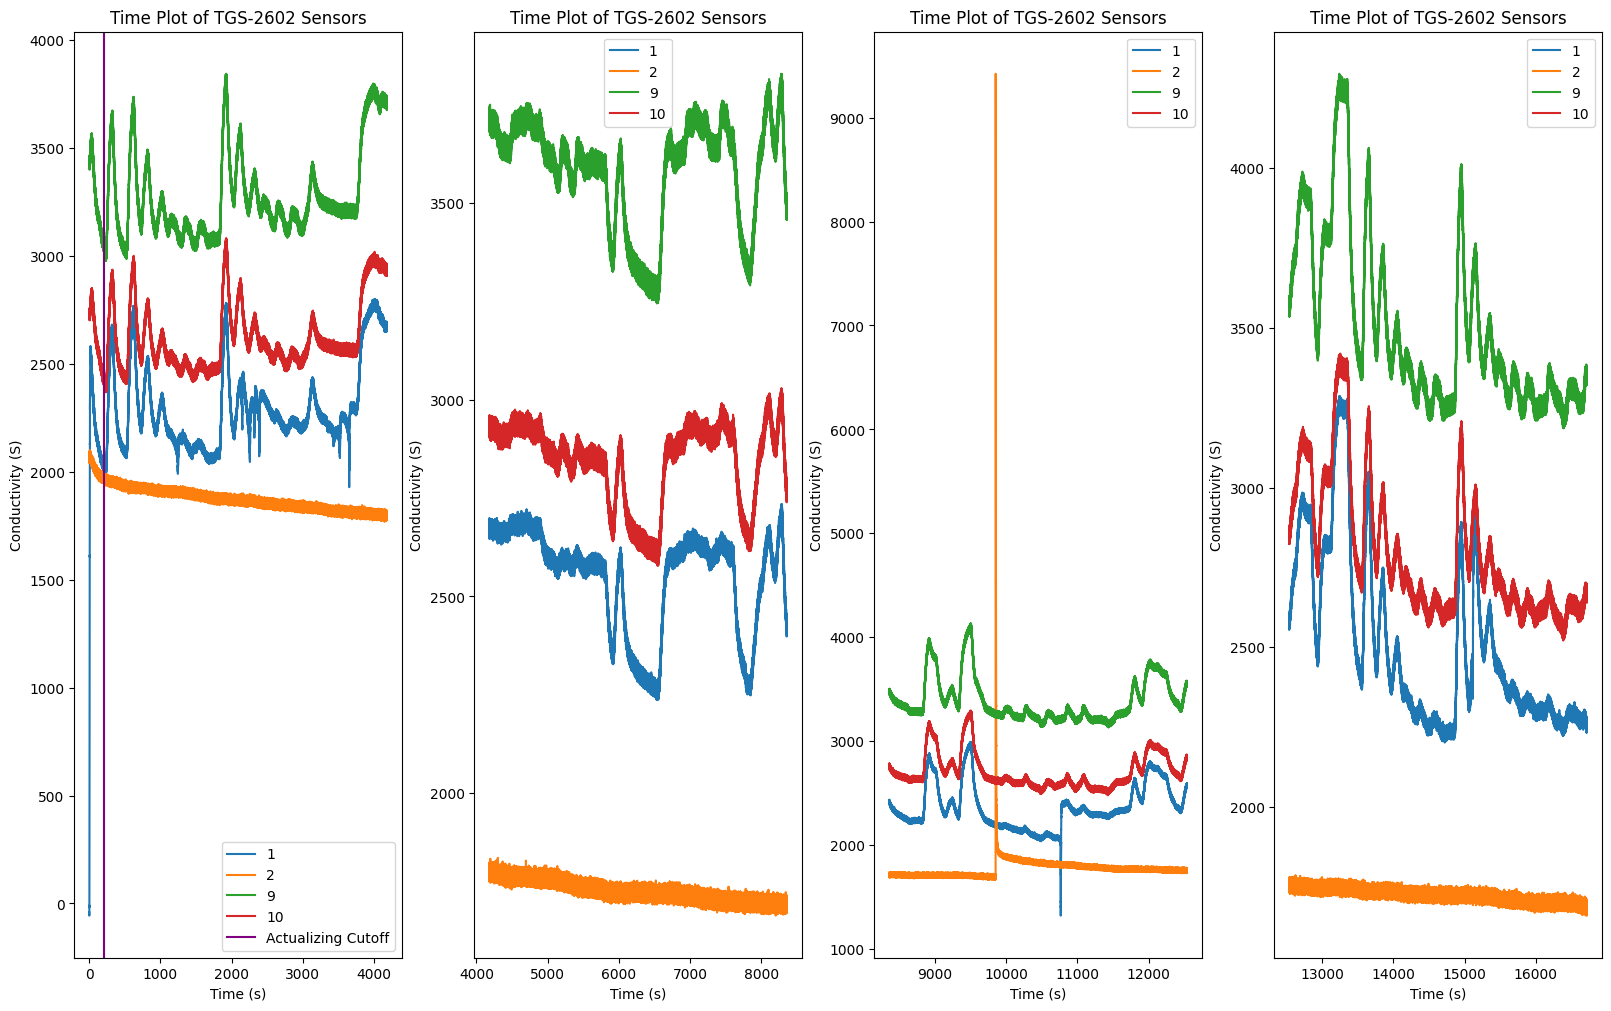

In [ ]:
# Plot TG-2602 Sensors Over Time
sensors = [1, 2, 9, 10]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2602 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

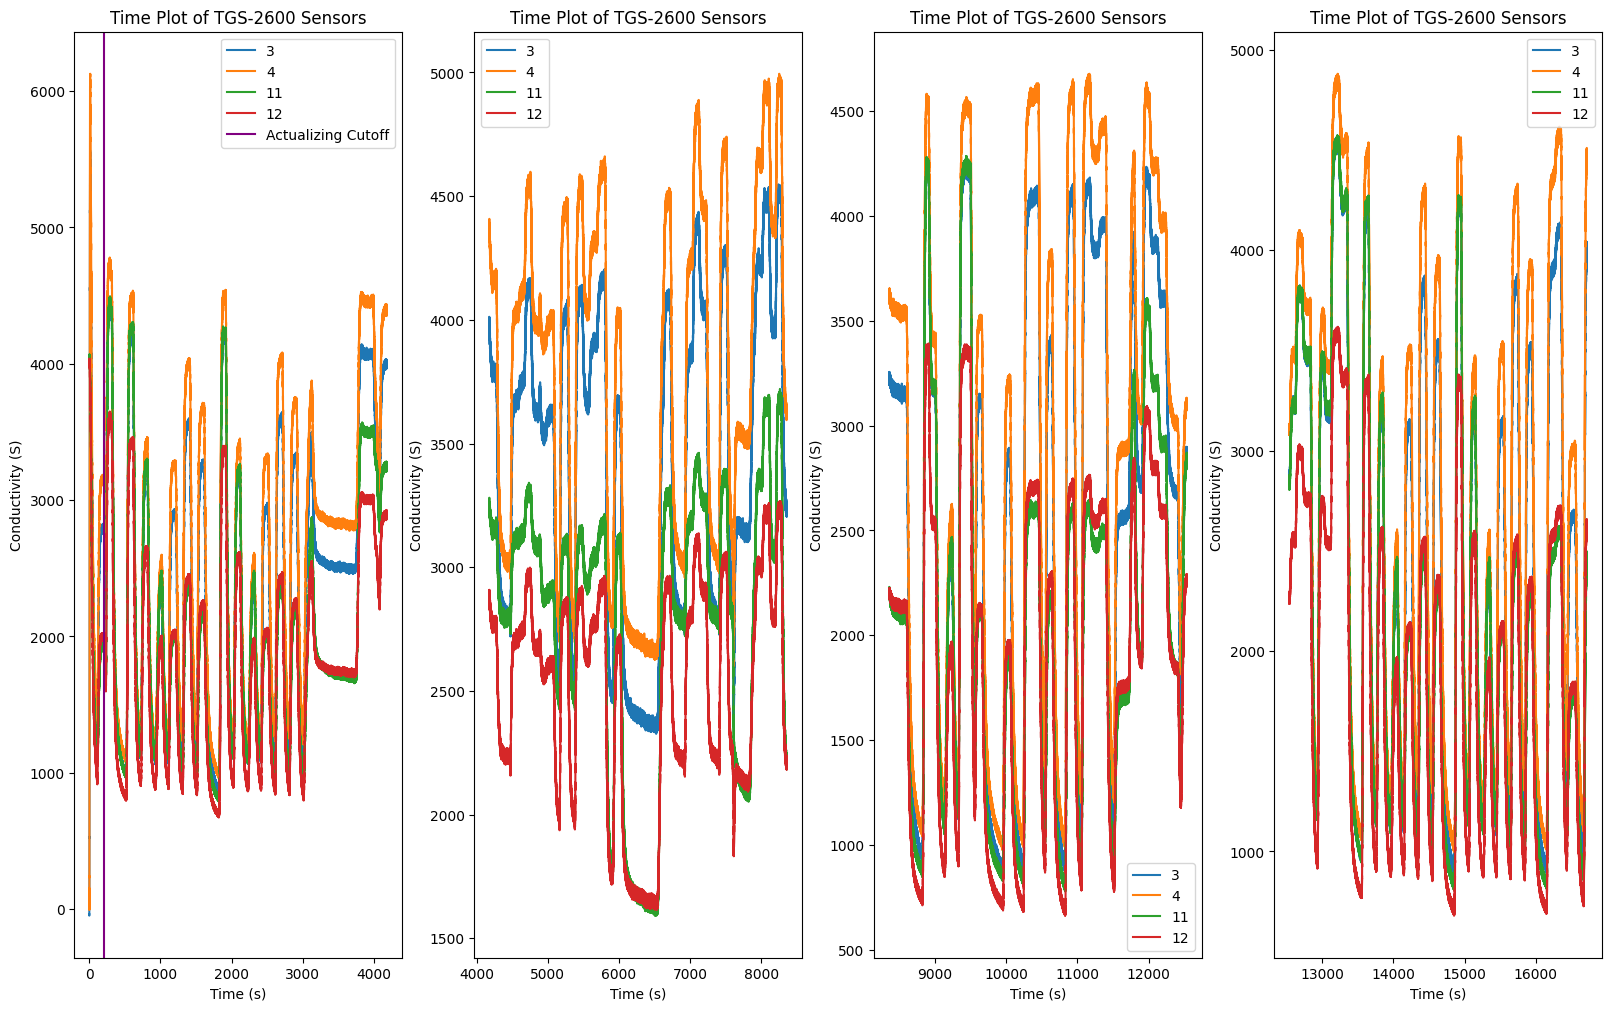

In [ ]:
# Plot TG-2600 Sensors Over Time
sensors = [3, 4, 11, 12]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2600 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

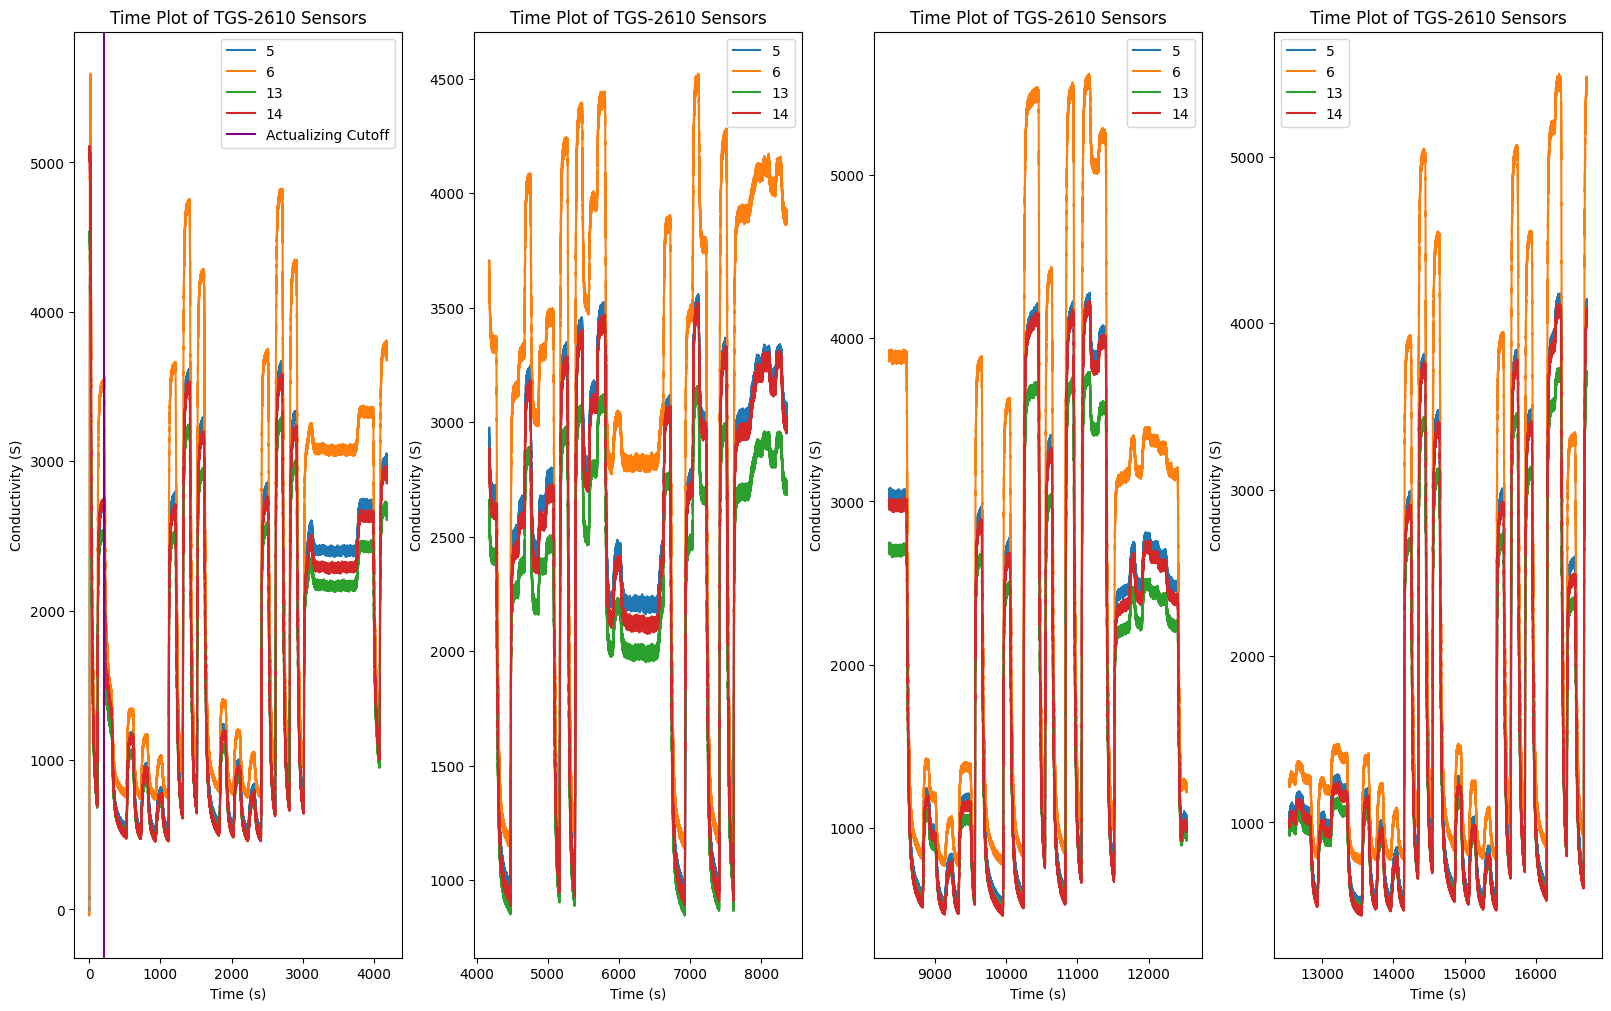

In [ ]:
# Plot TG-2610 Sensors Over Time
sensors = [5, 6, 13, 14]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2610 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

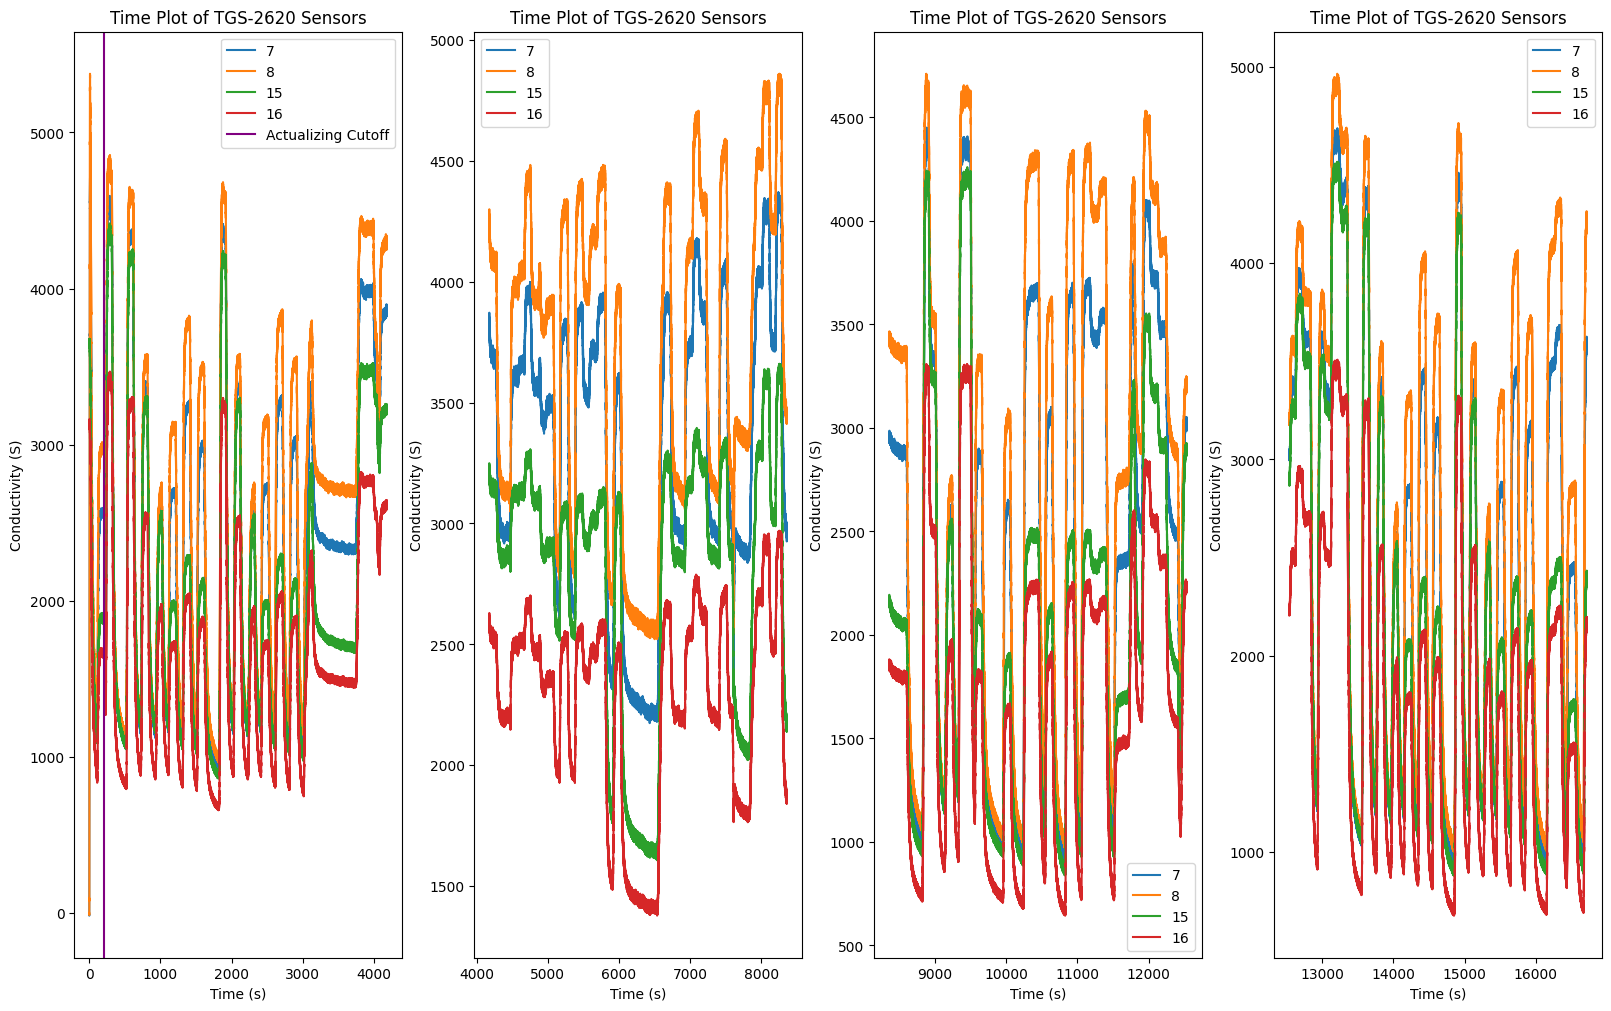

In [ ]:
# Plot TG-2620 Sensors Over Time
sensors = [7, 8, 15, 16]
fig_conduct = plt.figure(figsize = (16, 10), layout = "constrained")
# ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
# Cycler for conductivity plots
num_ranges = 4

ax_scatter_conduct_list = [fig_conduct.add_subplot(1, 4, j + 1) for j in range(num_ranges)]
for i in sensors:
    x_label_string = train_df.iloc[:,i].name
    for j in range(num_ranges):
        ax_scatter_conduct = ax_scatter_conduct_list[j]
        ax_scatter_conduct.plot(train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,0], train_df.iloc[j * train_df.shape[0] // 4: (j + 1) * train_df.shape[0] // 4,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of TGS-2620 Sensors") 
        if j > 0:
            ax_scatter_conduct.legend() 
ax_scatter_conduct_list[0].axvline(200, c = "purple", label = "Actualizing Cutoff")
ax_scatter_conduct_list[0].legend()
plt.show()

Remove first 200 seconds -> sensor are actualizing first 200 seconds

In [146]:
train_df = train_df[20000:]
x1_train = x1_train[20000:]
y_train = y_train[20000:]

Sensor 2 is clearly broken. We need to remove it going forward.

In [147]:
# Contain all sensors except sensor 2
good_x_cols = ['Time', '1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
good_sensor_cols = ['1','3','4','5','6','7','8','9','10','11','12','13','14','15','16']

# Dimensionality Reduction - Average Nonbroken Sensors of Same Type

We will be doing lots of feature engineering later on - need to reduce dimensions now to save compute power

In [148]:
x1_train[good_sensor_cols].mean(axis = 1)

20000      2529.024667
20001      2526.792667
20002      2529.072000
20003      2527.464000
20004      2526.808667
              ...     
1671396    3439.450667
1671397    3440.178667
1671398    3440.988667
1671399    3436.014667
1671400    3441.641333
Length: 1651401, dtype: float64

In [149]:
# Define columns we want to take averages of 
# Note: Sensor 2 is broken - don't include it
tgs2602_cols = ['1', '9', '10']
tgs2600_cols = ['3', '4', '11', '12']
tgs2610_cols = ['5', '6', '13', '14']
tgs2620_cols = ['7', '8', '15', '16']


In [150]:
# Get the averages and combine them into a dataframe
x1_train_reduced = pd.concat([x1_train[tgs2602_cols].mean(axis = 1),
                              x1_train[tgs2600_cols].mean(axis = 1),
                              x1_train[tgs2610_cols].mean(axis = 1),
                              x1_train[tgs2620_cols].mean(axis = 1)
                              ], axis = 1)
x1_train_reduced.columns = ["tgs2602_avg", "tgs2600_avg", "tgs2610_avg", "tgs2620_avg"]
x1_test_reduced = pd.concat([x1_test[tgs2602_cols].mean(axis = 1),
                              x1_test[tgs2600_cols].mean(axis = 1),
                              x1_test[tgs2610_cols].mean(axis = 1),
                              x1_test[tgs2620_cols].mean(axis = 1)
                              ], axis = 1)
x1_test_reduced.columns = ["tgs2602_avg", "tgs2600_avg", "tgs2610_avg", "tgs2620_avg"]

In [114]:
x1_train_reduced.head(5)

tgs2602_avg  tgs2600_avg  tgs2610_avg  tgs2620_avg
20000  2507.930000    2468.1800    2863.8975    2270.8175
20001  2498.106667    2468.4525    2861.5425    2271.8975
20002  2506.200000    2461.6750    2861.4400    2281.2550
20003  2503.563333    2466.1425    2862.6625    2271.5125
20004  2498.760000    2469.2350    2864.3825    2267.8450

In [72]:
x1_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1631401 entries, 40000 to 1671400
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   tgs2602_avg  1631401 non-null  float64
 1   tgs2600_avg  1631401 non-null  float64
 2   tgs2610_avg  1631401 non-null  float64
 3   tgs2620_avg  1631401 non-null  float64
dtypes: float64(4)
memory usage: 62.2 MB


## Perform EDA on the averages

In [151]:
# Combine the dataframes
train_reduced_df = pd.concat([x1_train["Time"], x1_train_reduced, y_train], axis = 1)
test_reduced_df = pd.concat([x1_test["Time"], x1_test_reduced, y_test], axis = 1)

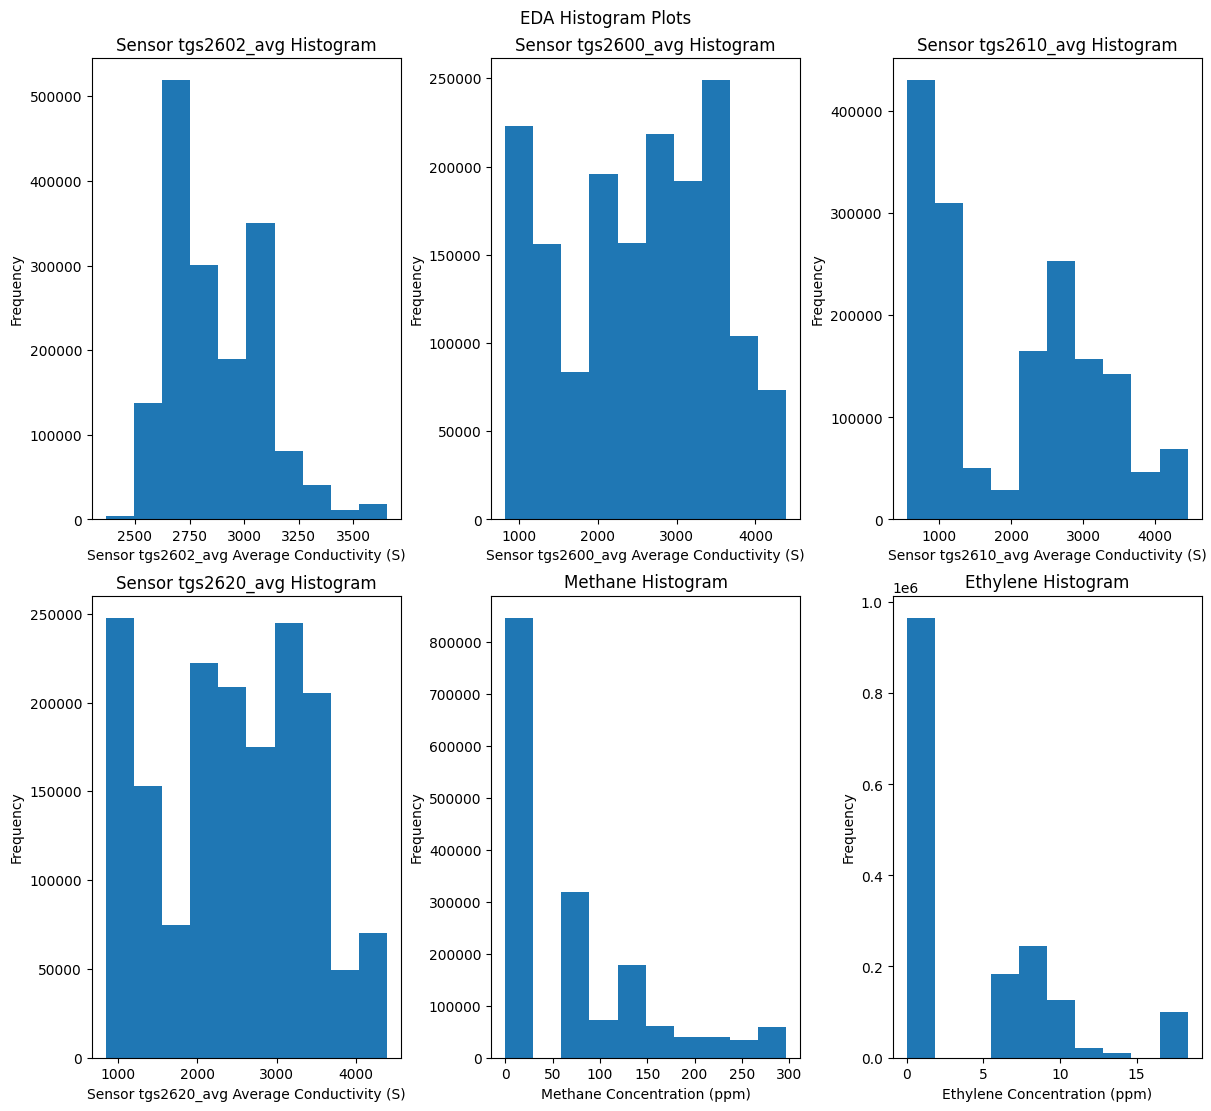

In [116]:
# Plot standard plots (all histograms + a time scatter plot)
num_features = len(train_reduced_df.columns)
fig = plt.figure(figsize = (12, 5 * num_features//3), layout = "constrained")
fig.suptitle("EDA Histogram Plots")
for i in range(1, num_features):
    ax1 = fig.add_subplot(num_features//3, 3, i)
    ax1.hist(train_reduced_df.iloc[:,i])
    x_label_string = train_reduced_df.iloc[:,i].name
    if i < num_features - 2:
        x_label_string = "Sensor " + x_label_string + " Average Conductivity (S)"
    else: 
        x_label_string = x_label_string + " Concentration (ppm)"
    ax1.set_xlabel(x_label_string)
    ax1.set_ylabel("Frequency")
    if i < num_features - 2:
        ax1.title.set_text("Sensor " + train_reduced_df.iloc[:,i].name + " Histogram")
    else:
        ax1.title.set_text(train_reduced_df.iloc[:,i].name + " Histogram") 
plt.show()

In [75]:
# Plot standard plots (all histograms + a time scatter plot)
num_features = len(train_reduced_df.columns)
fig_conduct = plt.figure(figsize = (12, 10), layout = "constrained")
ax_scatter_conduct = fig_conduct.add_subplot(2, 1, 1)
ax_scatter_concentration = fig_conduct.add_subplot(2, 1, 2)
# Cycler for conductivity plots

for i in range(1, num_features):
    x_label_string = train_reduced_df.iloc[:,i].name
    if i < num_features - 2:
        ax_scatter_conduct.plot(train_reduced_df.iloc[:,0], train_reduced_df.iloc[:,i], label = x_label_string)
        ax_scatter_conduct.legend()
        ax_scatter_conduct.set_xlabel("Time (s)")
        ax_scatter_conduct.set_ylabel("Conductivity (S)")
        ax_scatter_conduct.title.set_text("Time Plot of Sensors") 
        ax_scatter_conduct.legend() 
    else:  
        ax_scatter_concentration.plot(train_reduced_df.iloc[:,0], train_reduced_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel("Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations")
        ax_scatter_concentration.legend()   
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

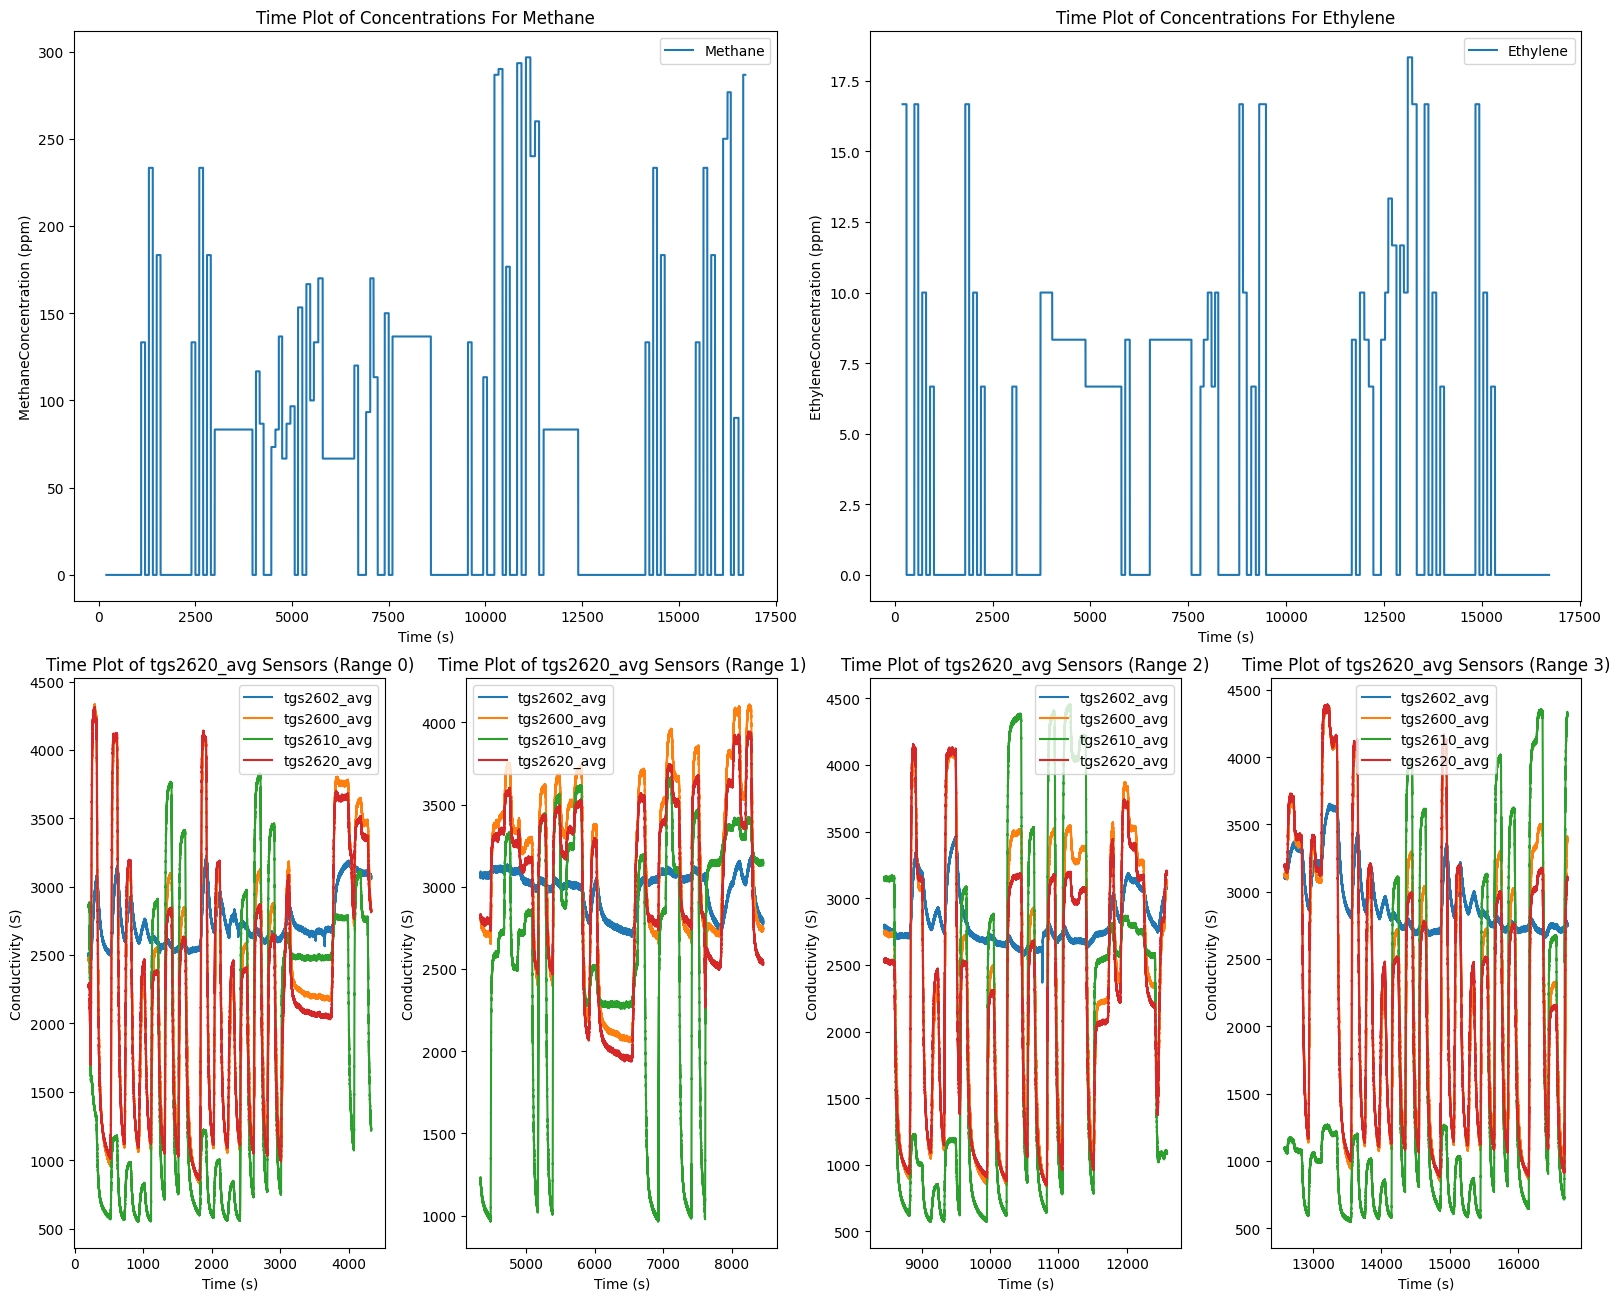

In [ ]:
# Make EDA Plots
# Break the plots down into different ranges

num_features = len(train_reduced_df.columns)
data_len = train_reduced_df.shape[0]
# Cycler for conductivity plots
fig_conduct = plt.figure(figsize = (16, 30), layout = "constrained")
ax_scatter_concentration_meth = fig_conduct.add_subplot(5, 4, (1, 2))
ax_scatter_concentration_ethy = fig_conduct.add_subplot(5, 4, (3, 4))
ax_scatter_conduct_list = [fig_conduct.add_subplot(5, 4, 4 * 1 + sub_idx) for sub_idx in range(1, 4 + 1)]
for i in range(1, num_features):
    x_label_string = train_reduced_df.iloc[:,i].name
    if i < num_features - 2:            
        for j in range(4):
            ax_scatter_conduct = ax_scatter_conduct_list[j]
            ax_scatter_conduct.plot(train_reduced_df.iloc[j * data_len//4: (j + 1) * data_len//4,0], train_reduced_df.iloc[j * data_len//4: (j + 1) * data_len//4,i], label = x_label_string)
            ax_scatter_conduct.legend()
            ax_scatter_conduct.set_xlabel("Time (s)")
            ax_scatter_conduct.set_ylabel("Conductivity (S)")
            ax_scatter_conduct.title.set_text("Time Plot of {} Sensors (Range {})".format(x_label_string, j)) 
            ax_scatter_conduct.legend() 
    else:  
        if i == num_features - 1:
            ax_scatter_concentration = ax_scatter_concentration_ethy
        else:
            ax_scatter_concentration = ax_scatter_concentration_meth
        ax_scatter_concentration.plot(train_reduced_df.iloc[:,0], train_reduced_df.iloc[:,i], label = x_label_string)
        ax_scatter_concentration.legend()
        ax_scatter_concentration.set_xlabel("Time (s)")
        ax_scatter_concentration.set_ylabel(x_label_string + "Concentration (ppm)")
        ax_scatter_concentration.title.set_text("Time Plot of Concentrations For " + x_label_string)
        ax_scatter_concentration.legend()   

# Define Helper Functions

## Define Metrics Function to easily get metrics

In [76]:
def get_main_metrics(actual, predict):
  '''Returns a tuple containing RMSE, RMSE / mean, RMSE / range, MAPE, and MAE'''
  # Calculate rmse
  rmse = mean_squared_error(actual, predict, squared = False)

  # Calculate mean and range
  mean = np.mean(actual)
  range_val = max(actual) - min(actual)

  # Calculate MAPE and MAE
  mape = mean_absolute_percentage_error(actual, predict)
  mae = mean_absolute_error(actual, predict)
  return (rmse, rmse/mean, rmse/range_val, mape, mae)

## Define Preprocessing Classes and Functions

In [77]:

class MAD_Adder(BaseEstimator, TransformerMixin):
    '''Adds a Moving Average and Derivatives'''
    def __init__(self, min_window = 2, max_window = 20, max_deriv = 2, best_ma_window = 0, best_deriv_subset = [1], debug = True):
        self.min_window = min_window
        self.max_window = max_window
        self.max_deriv = max_deriv
        self.best_ma_window = best_ma_window
        self.best_deriv_subset = best_deriv_subset
        self.debug = debug 
    
    def get_best_ma_window(self, x_train, y_train, x_test, y_test):
        moving_average_metrics = []
        prev_train_rolling = []
        prev_test_rolling = []
        lr_models = []
        # keep track of the best model
        best_model = None 
        best_model_rmse_div_mean = float("inf")
        best_size = -1
        best_data = None

        # Loop from window size of 2 to 20.
        for i in range(self.min_window, self.max_window + 1):
            if self.debug:
                print("Checking window of size {}:".format(i))
            lr = LinearRegression(n_jobs = -1)
            x_train_rolling = x_train.rolling(i).mean()
            x_test_rolling = x_test.rolling(i).mean()
            # Fill NaN values - fill with smaller window
            x_train_rolling.iloc[0] = x_train.iloc[0]
            x_test_rolling.iloc[0] = x_test.iloc[0]
            prev_train_rolling.append(x_train_rolling.iloc[i - 2])
            prev_test_rolling.append(x_test_rolling.iloc[i - 2])
            # print(x_train_rolling.head(10))
            for j in range(2, i):
                x_train_rolling.iloc[j - 1] = prev_train_rolling[j - 2]
                x_test_rolling.iloc[j - 1] = prev_test_rolling[j - 2]
                
            # Fit the models
            lr.fit(x_train_rolling, y_train)
            
            # Get predictions
            lr_predictions = lr.predict(x_test_rolling)
            
            # Add the models to a list
            lr_models.append(lr)
            
            metrics = get_main_metrics(y_test, lr_predictions)
            moving_average_metrics.append(metrics)
            if self.debug:
                print("RMSE/Mean =", metrics[1])
            
            # Compare best 
            if metrics[1] < best_model_rmse_div_mean:
                best_model_rmse_div_mean = metrics[1]
                best_size = i
                best_model = lr
                best_data = [x_train_rolling, x_test_rolling]
        
        
        if self.debug:
            print("The best window size is {} with an RMSE/mean = {}".format(best_size, best_model_rmse_div_mean))
        return (best_model, best_data, best_model_rmse_div_mean, best_size)
    
    def get_all_subsets(self, lst):
        subsets = []
        n = len(lst)
        
        # Iterate through 2**n (total number of subsets for a set of size n)
        for i in range(2**n):
            subset = []
            
            for j in range(n):
                # Check if j-th bit in the binary representation of i is set
                if i & (1 << j):
                    subset.append(lst[j])
                    
            subsets.append(subset)
        return subsets
    
    def get_best_derivatives(self, window_size, x_train, y_train, x_test, y_test):
        deriv_list = [i + 1 for i in range(self.max_deriv)]
        deriv_subsets = self.get_all_subsets(deriv_list)[1:]
        lr_deriv_metrics = []
        lr_deriv_models = []
        # keep track of the best model
        lr_deriv_best_model = None 
        lr_deriv_best_model_rmse_div_mean = float("inf")
        lr_deriv_best_size = -1
        lr_deriv_best_data = None
        for i in range(len(deriv_subsets)):
            curr_subset = deriv_subsets[i]
            lr = LinearRegression(n_jobs = -1)
            deriv_list = []
            max_deriv = max(curr_subset)
            # Go and get the derivatives
            set_derivatives = False
            train_derivatives = None
            test_derivatives = None
            deriv_col_names = []
            if self.debug:
                print(curr_subset)
            for j in range(max_deriv):
                curr_deriv = j + 1
                if curr_deriv == 1:
                    curr_train_deriv = x_train.diff(window_size)/window_size
                    curr_test_deriv = x_test.diff(window_size)/window_size
                else:
                    curr_train_deriv = curr_train_deriv.diff(window_size)/window_size
                    curr_test_deriv = curr_test_deriv.diff(window_size)/window_size
                if curr_deriv in curr_subset:
                    # Get the column names 
                    curr_deriv_col_names = ["d{}_".format(curr_deriv) + c_name for c_name in x_train.columns]
                    deriv_col_names = deriv_col_names + curr_deriv_col_names
                    
                    if set_derivatives:
                        # concatenate the derivative dataframes
                        train_derivatives = pd.concat([train_derivatives, curr_train_deriv], axis = 1)
                        test_derivatives = pd.concat([test_derivatives, curr_test_deriv], axis = 1)
                    else: 
                        train_derivatives = curr_train_deriv
                        test_derivatives = curr_test_deriv
                        set_derivatives = True
            # Create dataframes out of the derivative subsets
            train_derivatives.columns = deriv_col_names
            test_derivatives.columns = deriv_col_names
            # Replace NaN's with vales up ahead
            train_derivatives = train_derivatives.bfill()
            test_derivatives = test_derivatives.bfill()
            # Go and run linear regression now
            # Fit the models
            lr.fit(train_derivatives, y_train)
            # print(meth_train_derivatives.columns)
            # print(meth_test_derivatives.columns)
            # print(lr_deriv_meth_fitted.feature_names_in_)
            # Get predictions
            lr_deriv_predictions = lr.predict(test_derivatives)
            
            # Add the models to a list
            lr_deriv_models.append(lr)
            
            metrics = get_main_metrics(y_test, lr_deriv_predictions)
            lr_deriv_metrics.append(metrics)
            if self.debug == True:
                print("RMSE/Mean =", metrics[1])

            
            # Compare best 
            if metrics[1] < lr_deriv_best_model_rmse_div_mean:
                lr_deriv_best_model_rmse_div_mean = metrics[1]
                lr_deriv_best_size = curr_subset
                lr_deriv_best_model = lr
                lr_deriv_best_data = [train_derivatives, test_derivatives]
                
        if self.debug:
            print("The best derivatives are {} with an RMSE/mean = {}".format(lr_deriv_best_size, lr_deriv_best_model_rmse_div_mean))
        return (lr_deriv_best_model, lr_deriv_best_data, lr_deriv_best_model_rmse_div_mean, lr_deriv_best_size)
    
    def get_mad_features(self, x_train, y_train, x_test, y_test):
        '''Gets moving average and derivative features'''
        ma_features = self.get_best_ma_window(x_train, y_train, x_test, y_test)
        best_window = ma_features[3]
        d_features = self.get_best_derivatives(best_window, x_train, y_train, x_test, y_test)
        return (ma_features, d_features)
        
    def append_mad_features(self, separate, x_train, y_train, x_test, y_test):
        '''Appends moving average and derivative features to train and test sets'''
        mad_features = self.get_mad_features(x_train, y_train, x_test, y_test)
        ma_features = mad_features[0]
        d_features = mad_features[1]
        ma_data = ma_features[1]
        d_data = d_features[1]
        # Rename the moving average columns
        ma_data[0].columns = ["ma_{}".format(i) for i in ma_data[0].columns]
        ma_data[1].columns = ["ma_{}".format(i) for i in ma_data[1].columns]
        if separate:
            new_x_train = pd.concat([ma_data[0], d_data[0]], axis=1)
            new_x_test = pd.concat([ma_data[1], d_data[1]], axis=1)
        else:
            new_x_train = pd.concat([x_train, ma_data[0], d_data[0]], axis=1)
            new_x_test = pd.concat([x_test, ma_data[1], d_data[1]], axis=1)
        return (new_x_train, new_x_test, mad_features)
    
    def get_fixed_ma_window(self, window_size, x_data):
        '''Gets rolling average of fixed size from data'''
        prev_rolling = []

        # Loop from window size of 2 to 20.
        for i in range(2, window_size + 1):
            x_data_rolling = x_data.rolling(i).mean()
            # Fill NaN values - fill with smaller window
            x_data_rolling.iloc[0] = x_data.iloc[0]

            prev_rolling.append(x_data_rolling.iloc[i - 2])
            # print(x_train_rolling.head(10))
            for j in range(2, i):
                x_data_rolling.iloc[j - 1] = prev_rolling[j - 2]
                
        return x_data_rolling
    
    def get_fixed_derivatives(self, window_size, deriv_subset, x_data):
        '''Gets derivatives of fixed subset from data'''
        curr_subset = deriv_subset
        max_deriv = max(curr_subset)
        # Go and get the derivatives
        set_derivatives = False
        derivatives = None
        deriv_col_names = []
        for j in range(max_deriv):
            curr_deriv = j + 1
            if curr_deriv == 1:
                curr_data_deriv = x_data.diff(window_size)/window_size
            else:
                curr_data_deriv = curr_data_deriv.diff(window_size)/window_size
            if curr_deriv in curr_subset:
                # Get the column names 
                curr_deriv_col_names = ["d{}_".format(curr_deriv) + c_name for c_name in x_data.columns]
                deriv_col_names = deriv_col_names + curr_deriv_col_names
                # print(curr_deriv, curr_deriv_col_names, deriv_col_names)
                if set_derivatives:
                    # concatenate the derivative dataframes
                    derivatives = pd.concat([derivatives, curr_data_deriv], axis = 1)
                    # print("Appending derivatives")
                else: 
                    derivatives = curr_data_deriv
                    set_derivatives = True
        # Create dataframes out of the derivative subsets
        derivatives.columns = deriv_col_names
        # Replace NaN's with vales up ahead
        derivatives = derivatives.bfill()
        return derivatives
    
    
    def get_fixed_mad_features(self, x_data, best_ma_window, best_deriv_subset):
        '''Gets fixed moving average and derivative features (no training)'''
        ma_features = self.get_fixed_ma_window(best_ma_window, x_data)
        d_features = self.get_fixed_derivatives(best_ma_window, best_deriv_subset, x_data)
        # Rename the moving average columns
        ma_features.columns = ["ma_{}".format(i) for i in ma_features.columns]
        new_x_data = pd.concat([x_data, ma_features, d_features], axis=1)
        return new_x_data
        
    def fit(self, X, y):
        return self
    
    def transform(self, x):
        fixed_mad_features = self.get_fixed_mad_features(x, self.best_ma_window, self.best_deriv_subset)
        return fixed_mad_features
        
    
        


## Define GridSearchCV Helper Functions

In [17]:
model_collections = {}

In [18]:
def optimize_halving_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [19]:
def optimize_halving_pipeline(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    orig_cols = x_train.columns
    feature_adder = ColumnTransformer(transformers = [
        ("mad_adder", MAD_Adder(best_ma_window=2, best_deriv_subset=[1, 2]), orig_cols),
        ('poly_features', PolynomialFeatures(2), orig_cols)
    ], remainder = "passthrough")
    pipe = Pipeline([
        ('feature_adder', feature_adder),
        ('scaler', RobustScaler()),
        ('transformer', PowerTransformer()),
        ('pca', PCA(n_components=0.95)),
        ('model', model)
    ])
    total_param_grid = {}
    for key in param_grid.keys():
      total_param_grid["model__" + key] = param_grid[key]
    grid = HalvingGridSearchCV(estimator= pipe,
                      param_grid = total_param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

# Get Specific Y Values

In [179]:
y_meth_train = y_train["Methane"]
y_ethy_train = y_train["Ethylene"]

In [117]:
y_meth_train = y_train["Methane"][20000:]
y_meth_test = y_test["Methane"]
y_ethy_train = y_train["Ethylene"][20000:]
y_ethy_test = y_test["Ethylene"]

In [118]:
y_meth_train_vals = y_meth_train.values
y_meth_test_vals = y_meth_test.values
y_ethy_train_vals = y_ethy_train.values
y_ethy_test_vals = y_ethy_test.values

# Compare Linear Regression Results With No Other Preprocessing

In [22]:
lr_meth_no_preprocessing = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train, y_meth_train, x1_test, y_meth_test)
print(lr_meth_no_preprocessing[3])

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1671401
max_resources_: 1671401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1671401
Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 2/2; 1/1] START ............................................................
[CV 1/2; 1/1] START ............................................................
[CV 2/2; 1/1] END ......, score=(train=-35.958, test=-65.489) total time=   1.7s
[CV 1/2; 1/1] END ....., score=(train=-48.201, test=-139.969) total time=   1.7s
(48.80482505162849, 0.7706376369219914, 0.1645087978279856, 5.436176891264806e+16, 24.119443808021284)


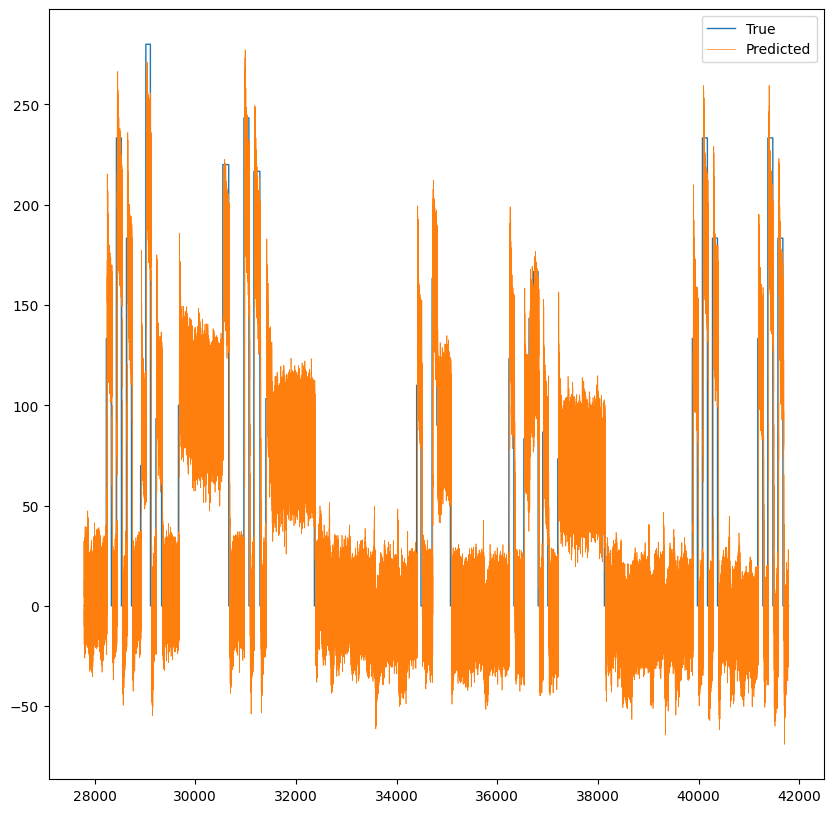

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, lr_meth_no_preprocessing[2], label = "Predicted",linewidth=0.5)
plt.legend()

In [65]:
lr_meth_avg_raw = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x1_train_reduced, y_meth_train, x1_test_reduced, y_meth_test)
print(lr_meth_avg_raw[3])

IndexError: list index out of range

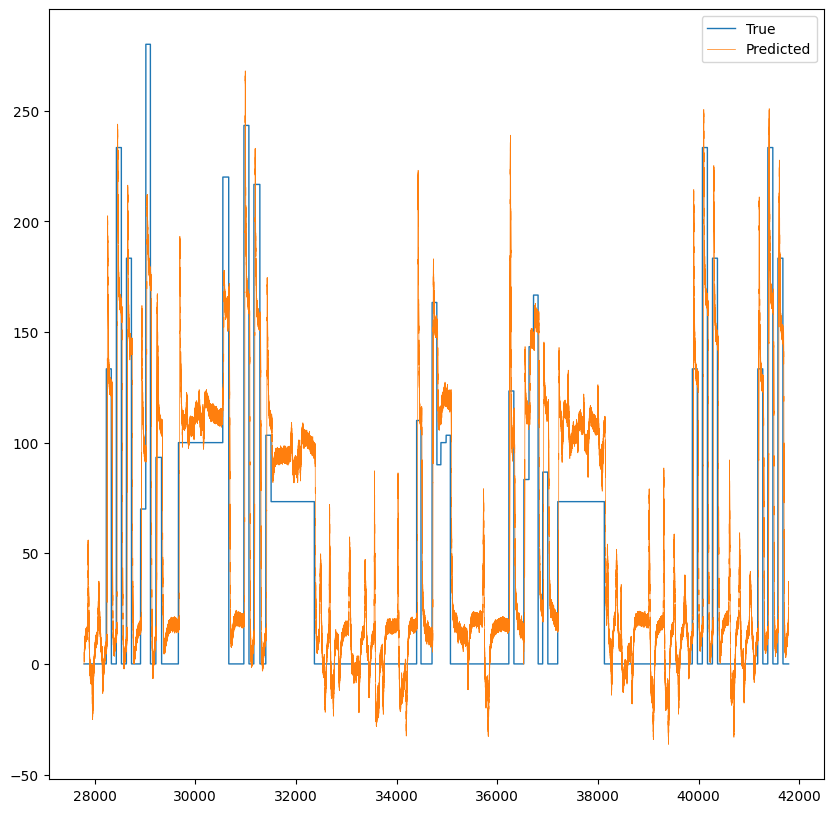

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, lr_meth_avg_raw[2], label = "Predicted",linewidth=0.5)
plt.legend()

# Perform Feature Engineering

## Get Derivatives and Moving Averages

In [152]:
mad_adder = MAD_Adder(max_deriv = 2)

In [153]:
# Get methane train and test x sets with rolling average and derivative features
# mad_meth_data = mad_adder.get_fixed_mad_features(True, 2, [1, 2])
mad_meth_train = mad_adder.get_fixed_mad_features(x1_train_reduced, 2, [1, 2])
mad_meth_test = mad_adder.get_fixed_mad_features(x1_test_reduced, 2, [1, 2])
print(mad_meth_train.head(10), mad_meth_test.head(10))

       tgs2602_avg  tgs2600_avg  tgs2610_avg  tgs2620_avg  ma_tgs2602_avg  \
20000  2507.930000    2468.1800    2863.8975    2270.8175     2507.930000   
20001  2498.106667    2468.4525    2861.5425    2271.8975     2503.018333   
20002  2506.200000    2461.6750    2861.4400    2281.2550     2502.153333   
20003  2503.563333    2466.1425    2862.6625    2271.5125     2504.881667   
20004  2498.760000    2469.2350    2864.3825    2267.8450     2501.161667   
20005  2512.536667    2469.4175    2859.8625    2271.9625     2505.648333   
20006  2506.426667    2469.7400    2855.9575    2275.0425     2509.481667   
20007  2499.590000    2468.9750    2864.7700    2263.4850     2503.008333   
20008  2505.523333    2472.4500    2856.0975    2272.4350     2502.556667   
20009  2500.940000    2474.9725    2859.7125    2266.5100     2503.231667   

       ma_tgs2600_avg  ma_tgs2610_avg  ma_tgs2620_avg  d1_tgs2602_avg  \
20000      2468.18000      2863.89750      2270.81750       -0.865000   
20001 

In [154]:
# Get ethylene train and test x sets with rolling average and derivative features
# mad_meth_data = mad_adder.get_fixed_mad_features(True, 2, [1, 2])
mad_ethy_train = mad_adder.get_fixed_mad_features(x1_train_reduced, 2, [1, 2])
mad_ethy_test = mad_adder.get_fixed_mad_features(x1_test_reduced, 2, [1, 2])
print(mad_ethy_train.head(10), mad_ethy_test.head(10))

       tgs2602_avg  tgs2600_avg  tgs2610_avg  tgs2620_avg  ma_tgs2602_avg  \
20000  2507.930000    2468.1800    2863.8975    2270.8175     2507.930000   
20001  2498.106667    2468.4525    2861.5425    2271.8975     2503.018333   
20002  2506.200000    2461.6750    2861.4400    2281.2550     2502.153333   
20003  2503.563333    2466.1425    2862.6625    2271.5125     2504.881667   
20004  2498.760000    2469.2350    2864.3825    2267.8450     2501.161667   
20005  2512.536667    2469.4175    2859.8625    2271.9625     2505.648333   
20006  2506.426667    2469.7400    2855.9575    2275.0425     2509.481667   
20007  2499.590000    2468.9750    2864.7700    2263.4850     2503.008333   
20008  2505.523333    2472.4500    2856.0975    2272.4350     2502.556667   
20009  2500.940000    2474.9725    2859.7125    2266.5100     2503.231667   

       ma_tgs2600_avg  ma_tgs2610_avg  ma_tgs2620_avg  d1_tgs2602_avg  \
20000      2468.18000      2863.89750      2270.81750       -0.865000   
20001 

## Get 2nd Order Polynomial Features

In [155]:
# Make the polynomial features with order = 2
poly_features = PolynomialFeatures(2)

In [156]:
# Train the polynomial transformer on the train data
poly_features.fit(x1_train_reduced)

PolynomialFeatures()

In [157]:
# Transform the train data on the fitted polynomial features
x_train_poly = poly_features.transform(x1_train_reduced)

In [158]:
# Transform the test data on the fitted polynomial features
x_test_poly = poly_features.transform(x1_test_reduced)

In [159]:
x_train_poly_df = pd.DataFrame(x_train_poly, columns = poly_features.get_feature_names_out())
# Rename intercept
x_train_poly_df.columns = ["intercept"] + list(x_train_poly_df.columns[1:])
x_test_poly_df = pd.DataFrame(x_test_poly, columns = poly_features.get_feature_names_out())
# Rename intercept
x_test_poly_df.columns = ["intercept"] + list(x_test_poly_df.columns[1:])

In [127]:
x_train_poly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651401 entries, 0 to 1651400
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   intercept                1651401 non-null  float64
 1   tgs2602_avg              1651401 non-null  float64
 2   tgs2600_avg              1651401 non-null  float64
 3   tgs2610_avg              1651401 non-null  float64
 4   tgs2620_avg              1651401 non-null  float64
 5   tgs2602_avg^2            1651401 non-null  float64
 6   tgs2602_avg tgs2600_avg  1651401 non-null  float64
 7   tgs2602_avg tgs2610_avg  1651401 non-null  float64
 8   tgs2602_avg tgs2620_avg  1651401 non-null  float64
 9   tgs2600_avg^2            1651401 non-null  float64
 10  tgs2600_avg tgs2610_avg  1651401 non-null  float64
 11  tgs2600_avg tgs2620_avg  1651401 non-null  float64
 12  tgs2610_avg^2            1651401 non-null  float64
 13  tgs2610_avg tgs2620_avg  1651401 non-null 

## Append the Moving Average And Derivative Features to the Polynomial Features

In [160]:
mad_meth_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1651401 entries, 20000 to 1671400
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tgs2602_avg     1651401 non-null  float64
 1   tgs2600_avg     1651401 non-null  float64
 2   tgs2610_avg     1651401 non-null  float64
 3   tgs2620_avg     1651401 non-null  float64
 4   ma_tgs2602_avg  1651401 non-null  float64
 5   ma_tgs2600_avg  1651401 non-null  float64
 6   ma_tgs2610_avg  1651401 non-null  float64
 7   ma_tgs2620_avg  1651401 non-null  float64
 8   d1_tgs2602_avg  1651401 non-null  float64
 9   d1_tgs2600_avg  1651401 non-null  float64
 10  d1_tgs2610_avg  1651401 non-null  float64
 11  d1_tgs2620_avg  1651401 non-null  float64
 12  d2_tgs2602_avg  1651401 non-null  float64
 13  d2_tgs2600_avg  1651401 non-null  float64
 14  d2_tgs2610_avg  1651401 non-null  float64
 15  d2_tgs2620_avg  1651401 non-null  float64
dtypes: float64(16)
memory usage: 214

In [161]:
x_meth_train_fe = pd.concat([x_train_poly_df, mad_meth_train.reset_index(drop = True)], axis = 1)
x_meth_test_fe = pd.concat([x_test_poly_df, mad_meth_test.reset_index(drop = True)], axis = 1)
x_ethy_train_fe = pd.concat([x_train_poly_df, mad_ethy_train.reset_index(drop = True)], axis = 1)
x_ethy_test_fe = pd.concat([x_test_poly_df, mad_ethy_test.reset_index(drop = True)], axis = 1)

In [130]:
x_meth_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651401 entries, 0 to 1651400
Data columns (total 31 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   intercept                1651401 non-null  float64
 1   tgs2602_avg              1651401 non-null  float64
 2   tgs2600_avg              1651401 non-null  float64
 3   tgs2610_avg              1651401 non-null  float64
 4   tgs2620_avg              1651401 non-null  float64
 5   tgs2602_avg^2            1651401 non-null  float64
 6   tgs2602_avg tgs2600_avg  1651401 non-null  float64
 7   tgs2602_avg tgs2610_avg  1651401 non-null  float64
 8   tgs2602_avg tgs2620_avg  1651401 non-null  float64
 9   tgs2600_avg^2            1651401 non-null  float64
 10  tgs2600_avg tgs2610_avg  1651401 non-null  float64
 11  tgs2600_avg tgs2620_avg  1651401 non-null  float64
 12  tgs2610_avg^2            1651401 non-null  float64
 13  tgs2610_avg tgs2620_avg  1651401 non-null 

# Redo EDA

# Perform Robust Scaler on Data 

In [162]:
# Create scaler
robust_meth_scaler = RobustScaler()
robust_ethy_scaler = RobustScaler()

In [163]:
# First, train all the data on the scalers
robust_meth_scaler.fit(x_meth_train_fe, y_train)
robust_ethy_scaler.fit(x_meth_train_fe, y_train)

RobustScaler()

In [164]:
# Second, transform all the train data on the fitted scalers
x_meth_train_fe_robust = robust_meth_scaler.transform(x_meth_train_fe)
x_ethy_train_fe_robust = robust_ethy_scaler.transform(x_meth_train_fe)

In [165]:
# Third, transform all the test data on the fitted scalers
x_meth_test_fe_robust = robust_meth_scaler.transform(x_meth_test_fe)
x_ethy_test_fe_robust = robust_ethy_scaler.transform(x_ethy_test_fe)

# Perform Power Transformer on Data 

In [166]:
# Create transformers
meth_power_transformer = PowerTransformer()
ethy_power_transformer = PowerTransformer()

In [167]:
# First, train all the data on the transformers
meth_power_transformer.fit(x_meth_train_fe_robust, y_train)
ethy_power_transformer.fit(x_ethy_train_fe_robust, y_train)

PowerTransformer()

In [168]:
# Second, transform all the train data on the fitted scalers
x_meth_train_ferp = meth_power_transformer.transform(x_meth_train_fe_robust)
x_ethy_train_ferp = ethy_power_transformer.transform(x_ethy_train_fe_robust)

In [169]:
# Third, transform all the test data on the fitted scalers
x_meth_test_ferp = meth_power_transformer.transform(x_meth_test_fe_robust)
x_ethy_test_ferp = ethy_power_transformer.transform(x_ethy_test_fe_robust)

# Perform Principal Component Analysis (PCA)

In [170]:
pca_meth = PCA()
pca_meth.fit(x_meth_train_ferp)
pca_ethy = PCA()
pca_ethy.fit(x_ethy_train_ferp)

PCA()

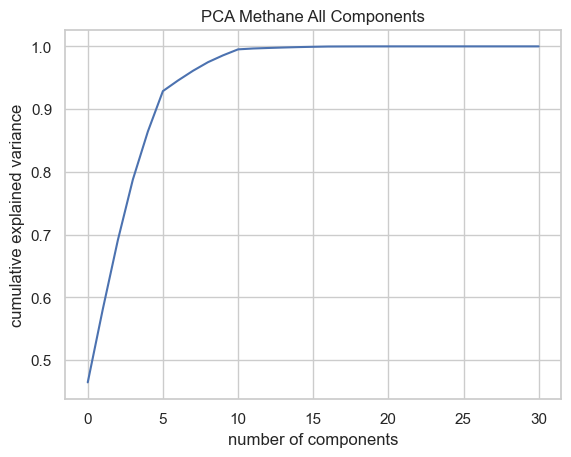

None

In [ ]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

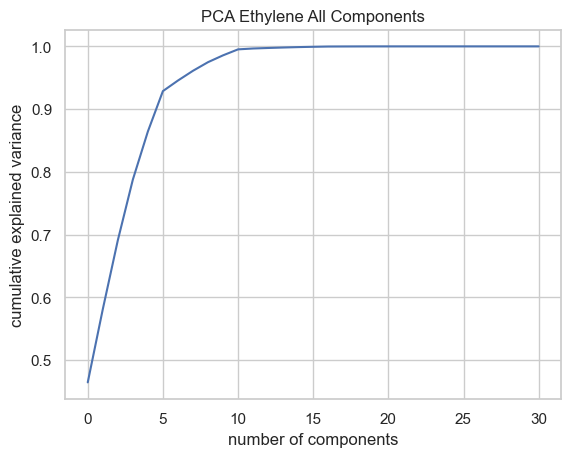

None

In [ ]:
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene All Components")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [54]:
# Implement 0.95 variance threshold
pca_meth_best = PCA(n_components=0.95)
pca_meth_best.fit(x_meth_train_ferp)
pca_ethy_best = PCA(n_components=0.95)
pca_ethy_best.fit(x_ethy_train_ferp)

PCA(n_components=0.95)

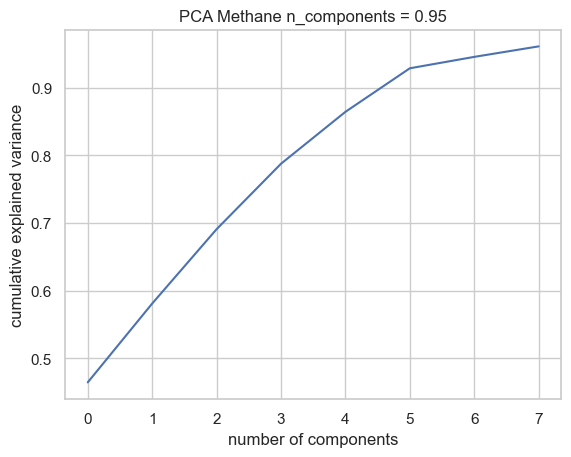

None

In [ ]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_meth_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Methane n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

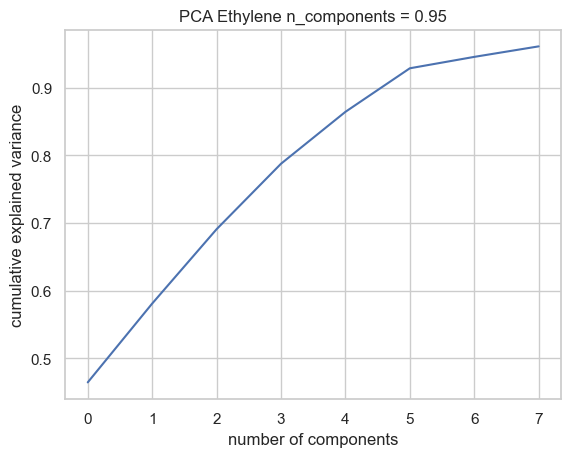

None

In [ ]:
# Make plots of cumulative explained variance
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_ethy_best.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA Ethylene n_components = 0.95")
# plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())

In [171]:
# Fit the PCA on the data
x_meth_train_preprocessed = pca_meth_best.transform(x_meth_train_ferp)
x_ethy_train_preprocessed = pca_ethy_best.transform(x_ethy_train_ferp)
x_meth_test_preprocessed = pca_meth_best.transform(x_meth_test_ferp)
x_ethy_test_preprocessed = pca_ethy_best.transform(x_ethy_test_ferp)

In [175]:
x_meth_train_preprocessed.shape

(1651401, 7)

In [180]:
y_meth_train.shape

(1651401,)

In [143]:
x_meth_test_preprocessed.shape

(1253551, 7)

In [61]:
y_meth_test2

1671401    286.67
1671402    286.67
1671403    286.67
1671404    286.67
1671405    286.67
            ...  
2924947     93.33
2924948     93.33
2924949     93.33
2924950     93.33
2924951     93.33
Name: Methane, Length: 1253551, dtype: float64

# Run Gradient Boosting

In [181]:
#Predict meth
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have already split your data as described in the previous response.

# Create and train a Gradient Boosting Regressor
gb_meth = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_meth.fit(x_meth_train_preprocessed, y_meth_train)

# Make predictions on the test set
y_pred_meth = gb_meth.predict(x_meth_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_meth_test, y_pred_meth)
print(f"Mean Squared Error (MSE): {mse}")

# If you need to access feature importances
feature_importances = gb_meth.feature_importances_

Mean Squared Error (MSE): 3870.4775570199286


In [183]:
#Get main metrics for meth
get_main_metrics(y_meth_test,y_pred)

(62.21316224899622,
 0.9823578773265397,
 0.20970493224456876,
 1.0200704627781883e+17,
 35.7977828667496)

In [187]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

In [184]:
#Predict meth
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have already split your data as described in the previous response.

# Create and train a Gradient Boosting Regressor
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
regressor.fit(x_ethy_train_preprocessed, y_meth_train)

# Make predictions on the test set
y_pred = regressor.predict(x_ethy_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_ethy_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# If you need to access feature importances
feature_importances = regressor.feature_importances_

Mean Squared Error (MSE): 10219.525458785061


In [185]:
#Get main metrics for meth
get_main_metrics(y_meth_test,y_pred)

(62.21316224899622,
 0.9823578773265397,
 0.20970493224456876,
 1.0200704627781883e+17,
 35.7977828667496)

In [ ]:
print(optimize_halving_model(regressor, ))

In [ ]:
def optimize_halving_model(model, param_grid, scoring, get_metrics, cv, verbose, n_jobs, x_train, y_train, x_test, y_test):
  """Optimizes a model given a parameter grid and a scaler using HalvingGridSearchCV"""
  try:
    grid = HalvingGridSearchCV(estimator= model,
                      param_grid = param_grid,
                      scoring=scoring,
                      cv=cv, 
                      verbose = verbose,
                      n_jobs=n_jobs)
    # Run fit on the GridSearchCV which will search for the best parameters
    grid_results = grid.fit(x_train, y_train)
    # Run predictions on the test dataset
    best_model_predictions = grid.predict(x_test)
    metrics = None
    if get_metrics:
        metrics = get_main_metrics(y_test, best_model_predictions)
    return (grid_results, y_test, best_model_predictions, metrics, grid_results.best_params_, grid_results.best_score_)
  except Exception as e:
    return ["error",[],str(e)]

In [202]:
gradient_boosting_param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [30, 40, 50, 60, 70, 80, 90],
    'loss': ["huber"],
    'max_depth': [2, 3, 4],
    'max_features': [3, 4, 5, 6],
}

In [203]:
#model for meth 
optim_gb_meth = optimize_halving_model(gb, gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_gb_meth[3])
model_collections["optim_gb_meth"] = optim_gb_meth

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 6795
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 6795
Fitting 2 folds for each of 252 candidates, totalling 504 fits
[CV 1/2; 1/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=30
[CV 2/2; 1/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=30
[CV 1/2; 1/252] END learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=30;, score=(train=-112.341, test=-91.980) total time=   0.1s
[CV 1/2; 2/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=40
[CV 2/2; 1/252] END learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=30;, score=(train=-63.225, test=-95.837) total time=   0.1s
[CV 1/2; 2/252] END learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=40;, score=(train=-111.75

In [205]:
optim_gb_meth

(HalvingGridSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=42),
                     n_jobs=-1,
                     param_grid={'learning_rate': [0.001, 0.01, 0.1],
                                 'loss': ['huber'], 'max_depth': [2, 3, 4],
                                 'max_features': [3, 4, 5, 6],
                                 'n_estimators': [30, 40, 50, 60, 70, 80, 90]},
                     scoring='neg_root_mean_squared_error', verbose=10),
 1671401    286.67
 1671402    286.67
 1671403    286.67
 1671404    286.67
 1671405    286.67
             ...  
 2924947     93.33
 2924948     93.33
 2924949     93.33
 2924950     93.33
 2924951     93.33
 Name: Methane, Length: 1253551, dtype: float64,
 array([278.47536386, 276.01225074, 275.00342263, ...,  92.07352816,
         91.29008678,  86.54258286]),
 (54.27152918815129,
  0.8569579536747923,
  0.1829356833793484,
  6.321622800018749e+16,
  26.433901428770675),
 {'learning_rate': 0.1,
  'loss': 'huber',
  'm

In [206]:
# Save the model to a file
import joblib
joblib.dump(optim_gb_meth, "best_models/best_meth_poly_gb.pkl")

['best_models/best_meth_poly_gb.pkl']

In [198]:
#model for ethy
optim_gb_ethy = optimize_halving_model(gb, gradient_boosting_param_grid, "neg_root_mean_squared_error", True, 2, 10, -1, x_ethy_train_preprocessed, y_ethy_train, x_ethy_test_preprocessed, y_ethy_test)
print(optim_gb_ethy[3])
model_collections["optim_gb_ethy"] = optim_gb_ethy

n_iterations: 5
n_required_iterations: 6
n_possible_iterations: 5
min_resources_: 6795
max_resources_: 1651401
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 252
n_resources: 6795
Fitting 2 folds for each of 252 candidates, totalling 504 fits
[CV 1/2; 2/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=40
[CV 2/2; 4/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=60
[CV 2/2; 1/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=30
[CV 1/2; 4/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=60
[CV 2/2; 3/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=50
[CV 1/2; 1/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=30
[CV 2/2; 2/252] START learning_rate=0.001, loss=huber, max_depth=2, max_features=3, n_estimators=40
[CV 1/2; 3/252] START learning_

In [201]:
optim_gb_ethy[4]

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 2,
 'max_features': 4,
 'n_estimators': 30}

In [200]:
# Save the model to a file
import joblib
joblib.dump(optim_gb_ethy, "best_models/best_ethy_poly_gb.pkl")

['best_models/best_ethy_poly_gb.pkl']

# Plot Results

/var/folders/r0/87kyszxn5vzb68thhmwz233c0000gn/T/ipykernel_27292/3335752449.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
/var/folders/r0/87kyszxn5vzb68thhmwz233c0000gn/T/ipykernel_27292/3335752449.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
/var/folders/r0/87kyszxn5vzb68thhmwz233c0000gn/T/ipykernel_27292/3335752449.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
/var/folders/r0/87kyszxn5vzb68thhmwz233c0000gn/T/ipykernel_27292/3335752449.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(best_model_labels, rotation = 45)
/var/folders/r0/87kyszxn5vzb68thhmwz233c0000gn/T/ipykernel_27292/3335752449.py:45: UserWarning: FixedFormatter should only be used together with

Text(0.5, 1.0, 'MAE of Hypertuned Models')

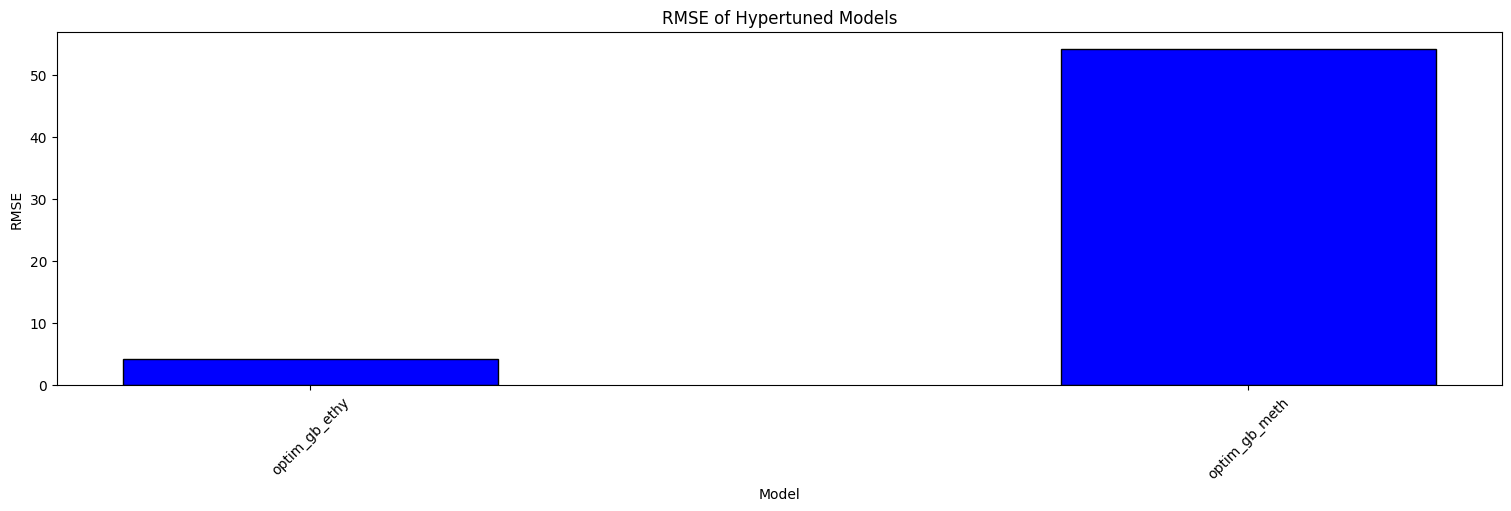

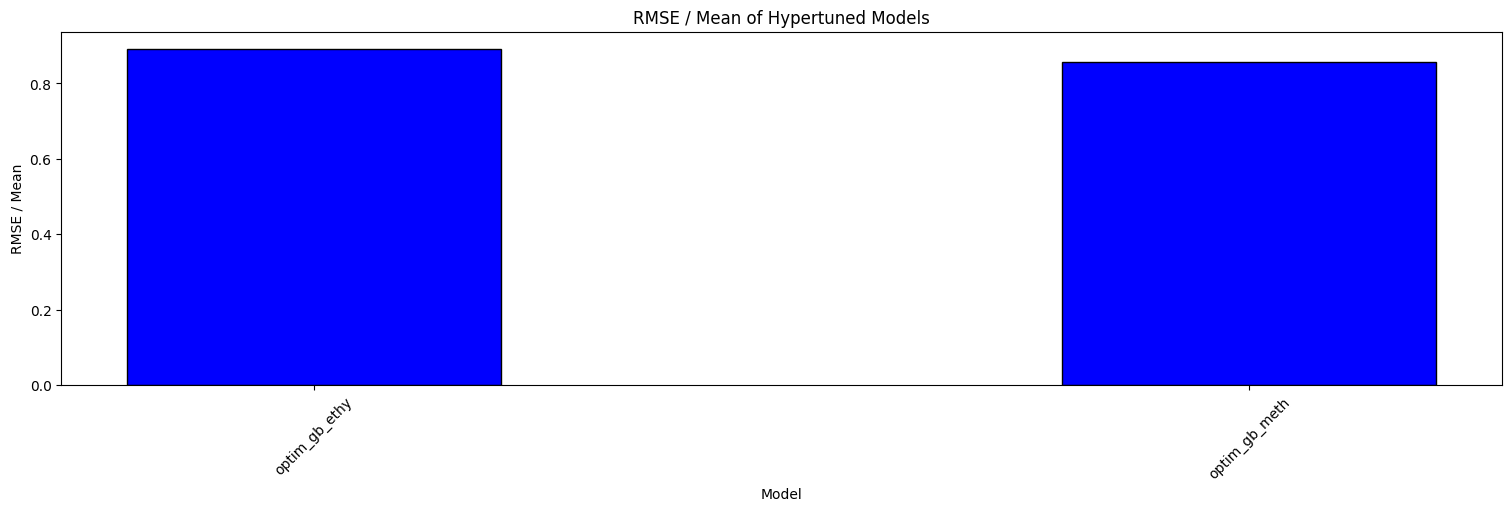

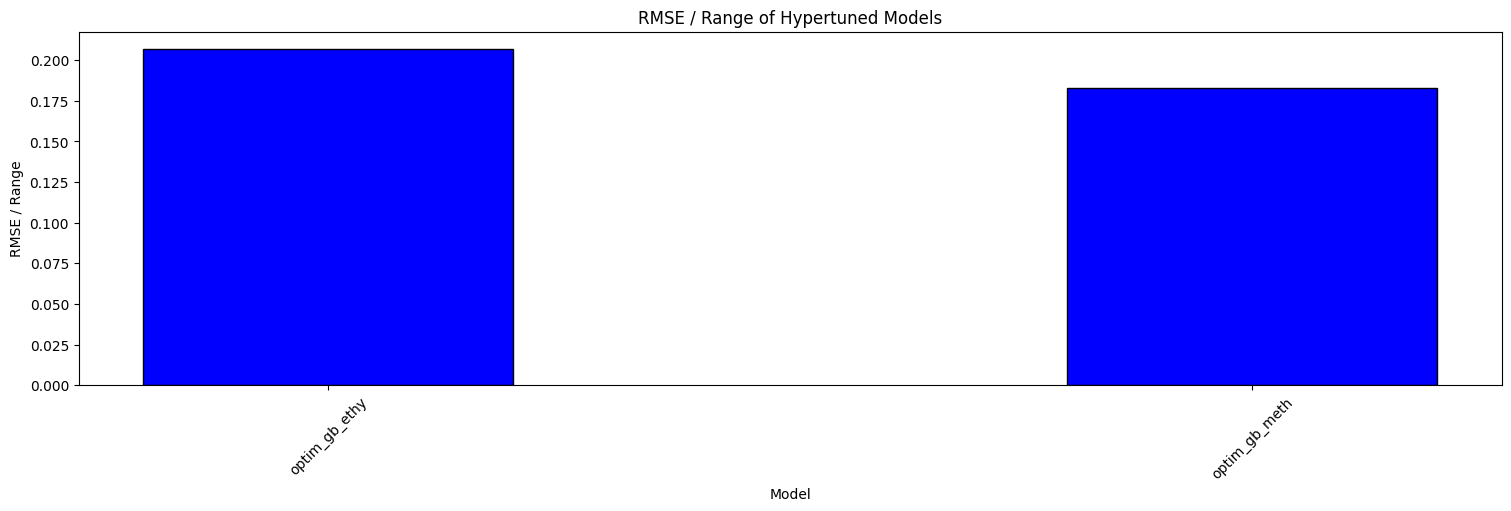

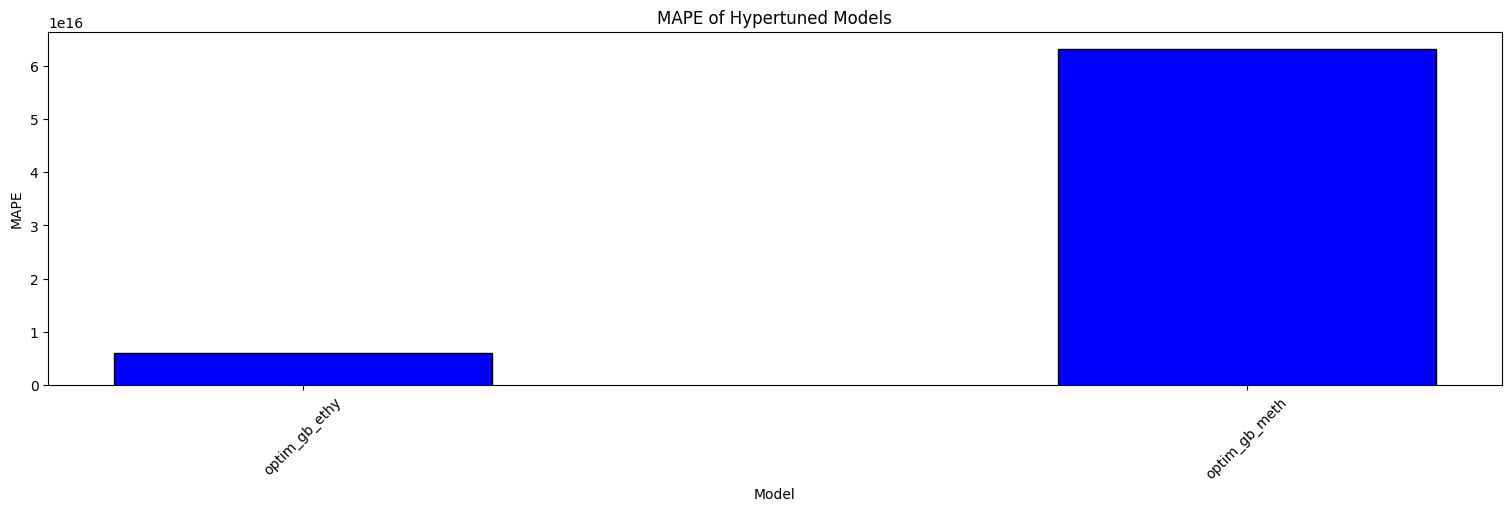

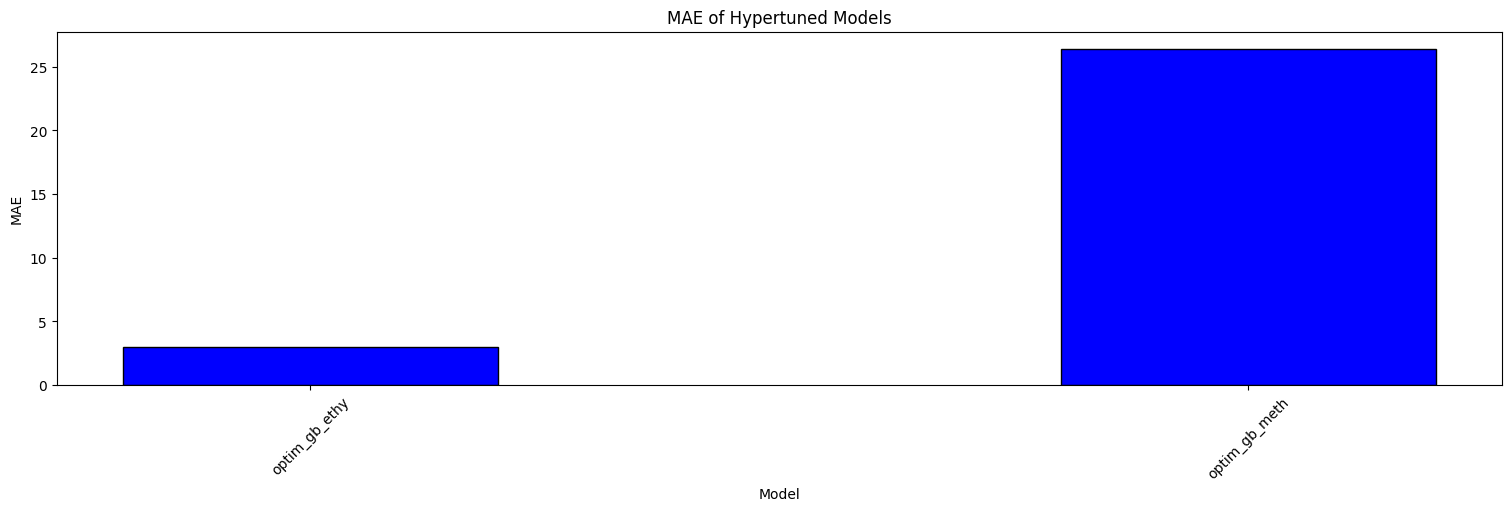

In [208]:
# Get Plots of the model data
best_model_labels = model_collections.keys()
rmses = [model_collections[label][3][0] for label in best_model_labels]

rmses_div_mean = [model_collections[label][3][1] for label in best_model_labels]
rmses_div_range = [model_collections[label][3][2] for label in best_model_labels]
mapes = [model_collections[label][3][3] for label in best_model_labels]
maes = [model_collections[label][3][4] for label in best_model_labels]

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE")
ax1.set_xlabel("Model")
ax1.set_title("RMSE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_mean, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Mean")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Mean of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, rmses_div_range, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("RMSE / Range")
ax1.set_xlabel("Model")
ax1.set_title("RMSE / Range of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, mapes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAPE")
ax1.set_xlabel("Model")
ax1.set_title("MAPE of Hypertuned Models")

fig = plt.figure(figsize = (15, 5), layout = "constrained")
ax1 = fig.add_subplot(1, 1, 1)
ax1.bar(best_model_labels, maes, color = 'blue', edgecolor='black', width = 0.4)
ax1.set_xticklabels(best_model_labels, rotation = 45)
ax1.set_ylabel("MAE")
ax1.set_xlabel("Model")
ax1.set_title("MAE of Hypertuned Models")

In [209]:
# Store residuals and predictions
predictions = []
residuals = []
for i in range(len(model_collections)):
    curr_best_model_label = list(best_model_labels)[i]
    curr_best_model_data = model_collections[curr_best_model_label]
    y_predictions = curr_best_model_data[2]
    # y_predictions = best_model_collections[i][1]
    predictions.append(y_predictions)
    # print(y_predictions.shape, len(y_predictions))
    # print(curr_y_test.shape, len(curr_y_test))
    # if len(y_predictions) > 100000:
    #   print(y_predictions, y_residuals)
    curr_y_test = curr_best_model_data[1]
    y_residuals = curr_y_test - y_predictions
    residuals.append(y_residuals)

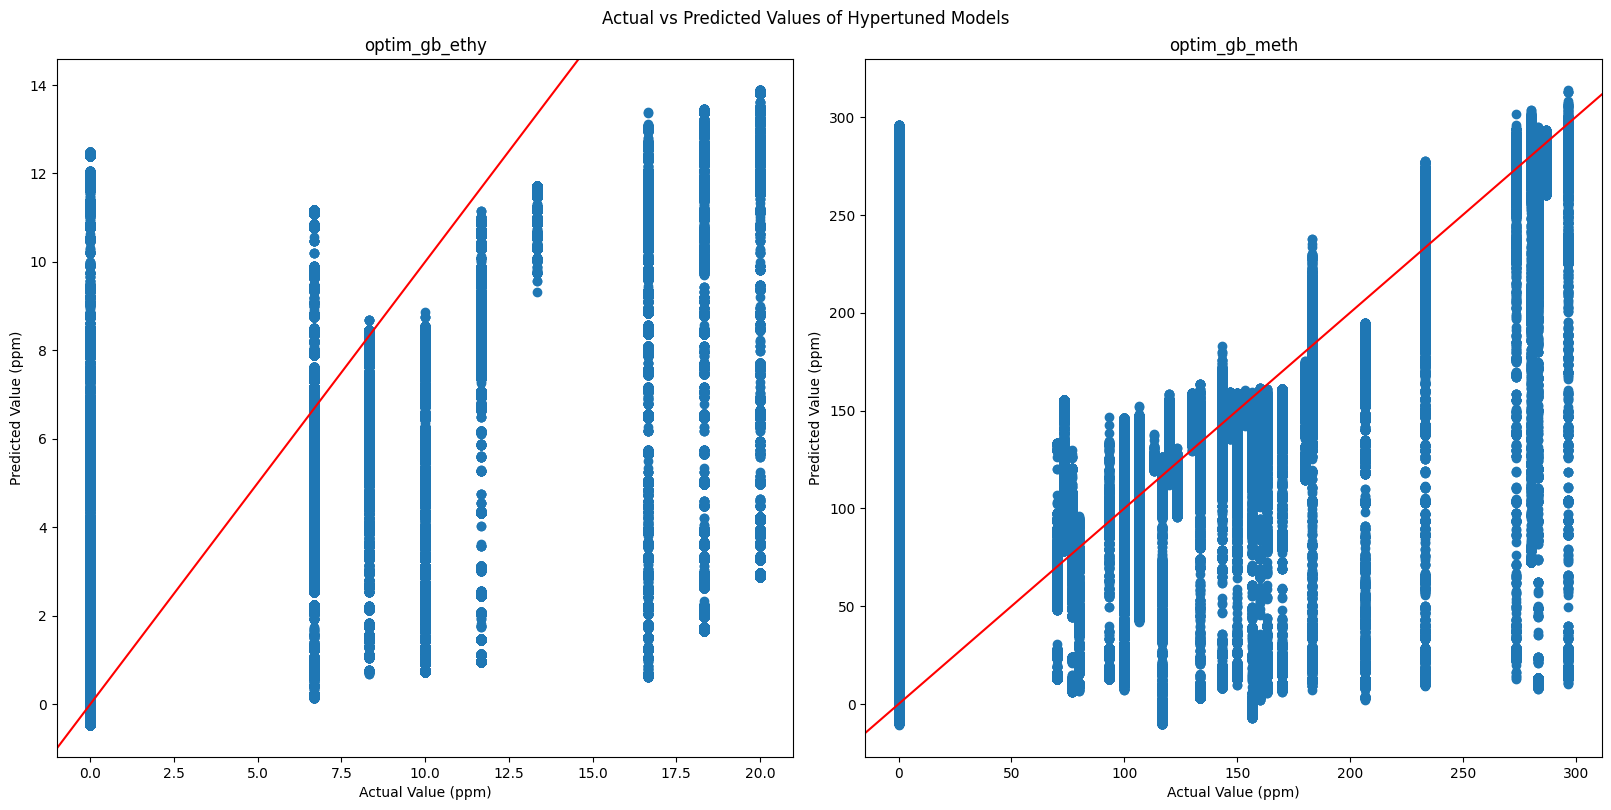

In [210]:
# Make plots of actual vs predicted values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]

  ax1 = fig.add_subplot(len(model_collections)//2 + 1, 2, i + 1)
  ax1.set_ylabel("Predicted Value (ppm)")
  ax1.set_xlabel("Actual Value (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  ax1.scatter(curr_best_model[1], curr_best_model[2])
  # Plot the line y = x
  ax1.axline((0, 0), slope=1, color = "r")
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

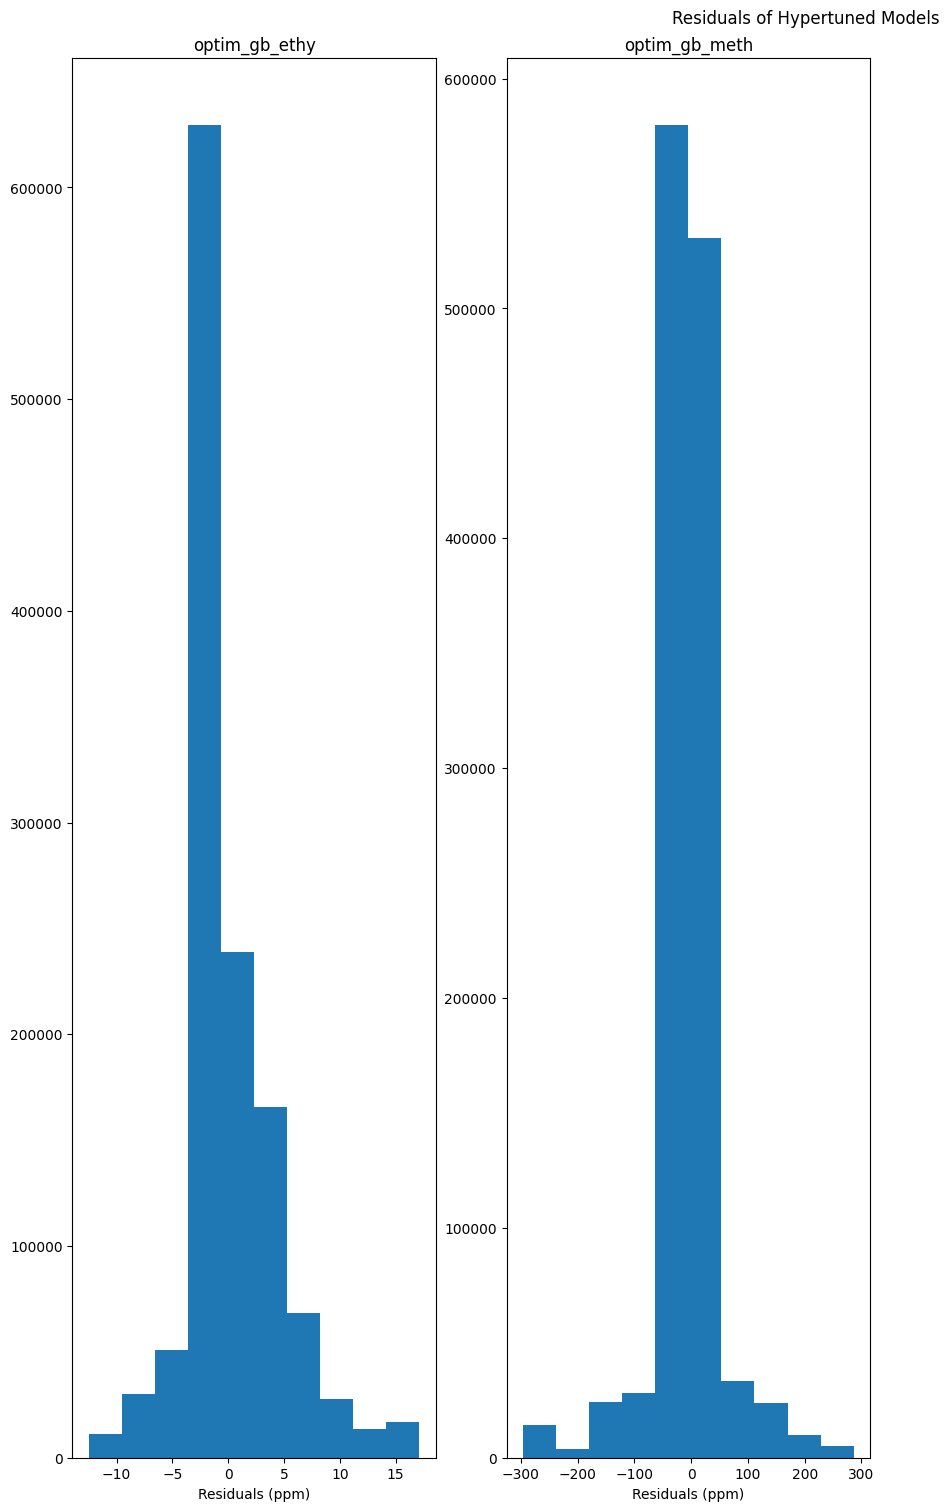

In [211]:
# Make plots of residuals values
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Residuals of Hypertuned Models")
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]
  ax1 = fig.add_subplot(len(model_collections)//4 + 1, 4, i + 1)
  ax1.set_xlabel("Residuals (ppm)")
  ax1.title.set_text(curr_best_model_label)
  # Plot the predicted y values vs the actual y values
  # print(residuals[i].shape, residuals[i])
  ax1.hist(curr_best_model[1] - curr_best_model[2])
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

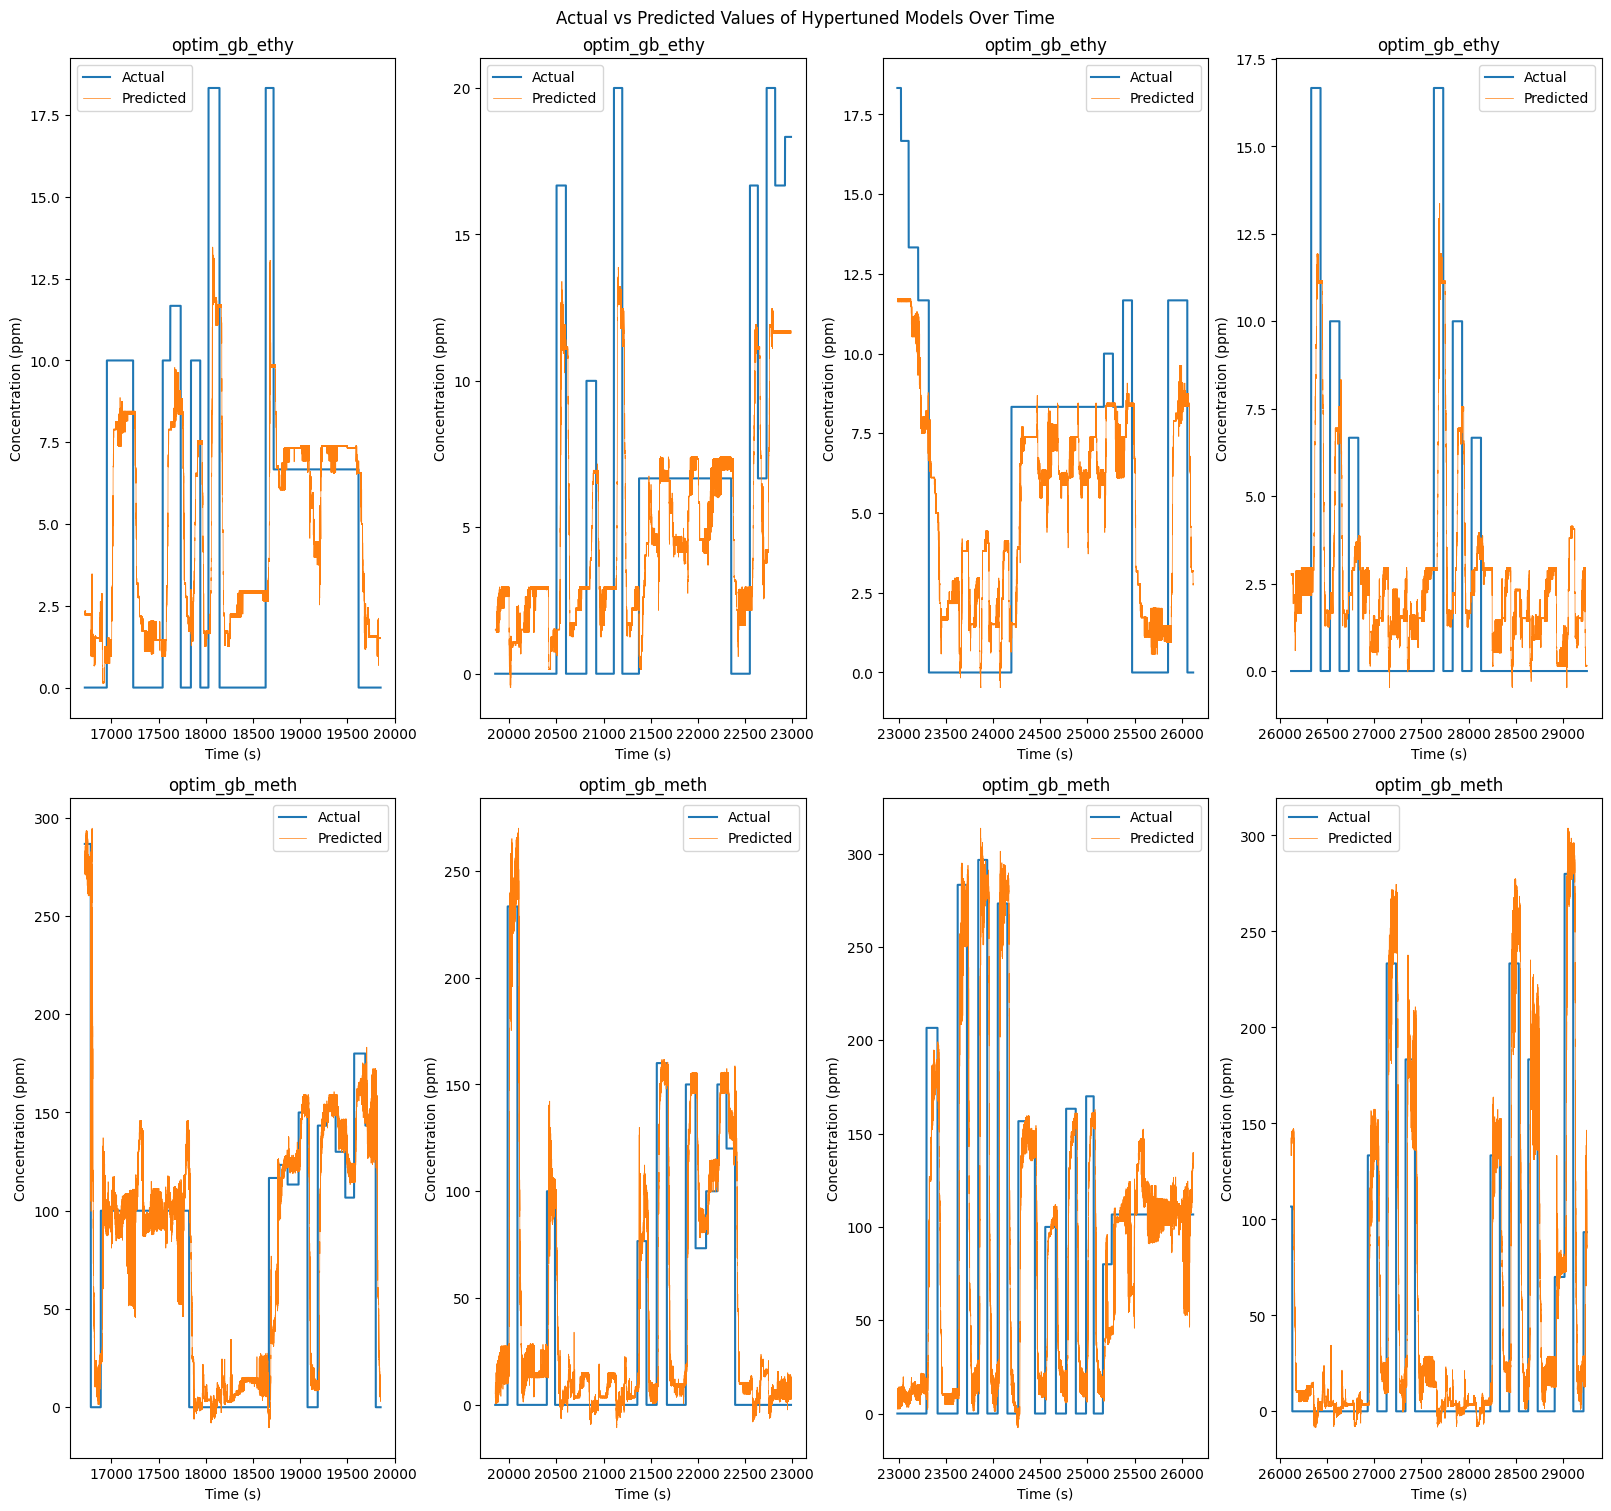

In [212]:
# Make plots of actual vs predicted values over time
fig = plt.figure(figsize=(16, 15), layout = "constrained")
fig.suptitle("Actual vs Predicted Values of Hypertuned Models Over Time")
num_ranges = 4
for i in range(len(model_collections)):
  curr_best_model_label = list(best_model_labels)[i]
  curr_best_model = model_collections[curr_best_model_label]


  for j in range(num_ranges):
    # Plot the ith range
    # Plot the predicted y values vs the actual y values
    ax1 = fig.add_subplot(len(model_collections), num_ranges, i * num_ranges + j + 1)
    ax1.set_ylabel("Concentration (ppm)")
    ax1.set_xlabel("Time (s)")
    ax1.title.set_text(curr_best_model_label)
    data_len = len(x1_test['Time'])
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[1][j * data_len // 4: (j + 1) * data_len // 4], label = "Actual")
    ax1.plot(x1_test['Time'][j * data_len // 4: (j + 1) * data_len // 4], curr_best_model[2][j * data_len // 4: (j + 1) * data_len // 4], label = "Predicted", linewidth = 0.5)
    ax1.legend()
  # Plot the line y = x
  # Make sure that the axes are the same
  # ax1.set_aspect('equal', adjustable='box')
plt.show()

# Run Linear SVR

In [ ]:
optim_lsvr_meth = optimize_halving_model(LinearRegression(), {}, "neg_root_mean_squared_error", True, 2, 10, -1, x_meth_train_preprocessed, y_meth_train, x_meth_test_preprocessed, y_meth_test)
print(optim_lsvr_meth[3])
model_collections["optim_lsvr_meth"] = optim_lsvr_meth

n_iterations: 1
n_required_iterations: 1
n_possible_iterations: 1
min_resources_: 1399799
max_resources_: 1399799
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1
n_resources: 1399799
Fitting 2 folds for each of 1 candidates, totalling 2 fits
(45.918104196164556, 1.030430194267786, 0.16399322927201626, 5.341310075148671e+16, 26.854159044504897)


In [ ]:
# Save the model to a file
import joblib
joblib.dump(optim_lsvr_meth, "models/best_meth_poly_lsvr.pkl")

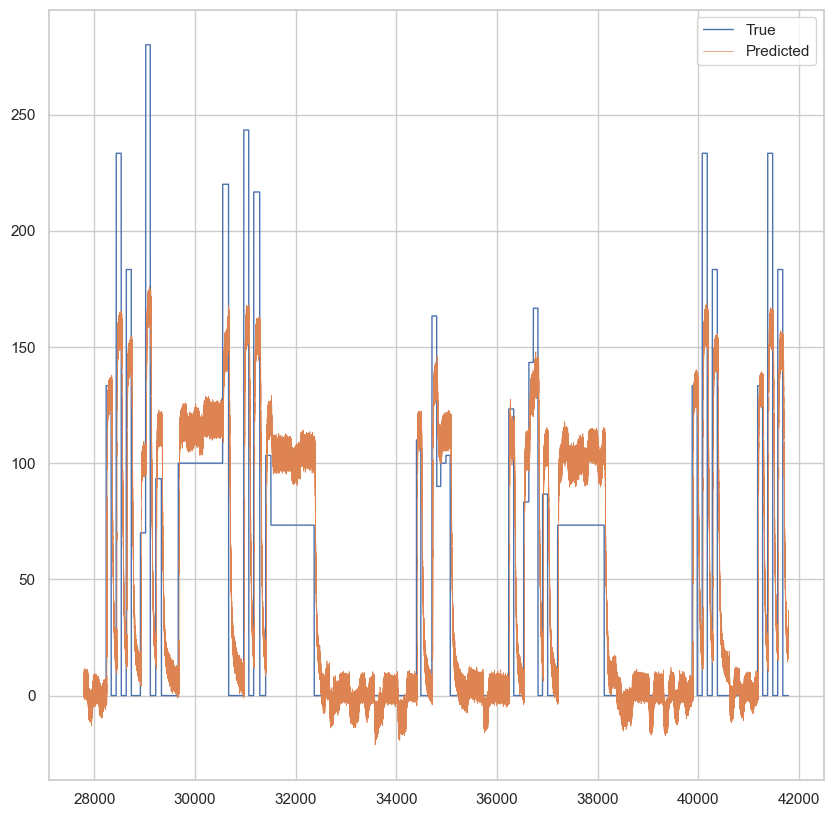

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(x1_test['Time'].values, y_meth_test.values, label = "True", linewidth=1)
plt.plot(x1_test['Time'].values, optim_lsvr_meth[2], label = "Predicted",linewidth=0.5)
plt.legend()